In [9]:
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
# # 칼럼순서 재설정
# # Oracle 데이터베이스 연결
# connection = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')

# # 쿼리 실행하여 데이터프레임 생성
# query = 'SELECT YEAR, HYEAR, 제휴사, 반기별매출 FROM MASTERDATA'
# df_hr = pd.read_sql(query, con=connection)

# # 칼럼 순서 변경
# df_hr = df_hr[['YEAR', 'HYEAR', '제휴사', '반기별매출']]

# # 연결 종료
# connection.close()

# df_hr.head()

In [3]:
import pickle

with open('../dataset/scustomerdata.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [4]:
cd = loaded_data

In [5]:
cd.head(2)

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
0,00752,M,노년층,울산,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,일상용품,패션잡화,가공식품,일상용품,패션잡화,가공식품,디지털/가전,패션잡화,일상용품,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55
1,00754,F,노년층,서울,2.0,13.0,13.0,NaN,A,2,A2,5648899.0,6560856.0,4868150.0,19591410.0,3494579.0,4871427.0,1973879.0,12647258.0,934973.0,-1768137.0,15505680.0,-16803490.0,1386354.0,-2915258.0,11151190.0,6,619,60431637,97627.85,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,7491312.0,0,2,10,3,3,116.14,74.20,402.44,17.84,139.40,40.52,640.73


In [7]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19383 entries, 0 to 19382
Data columns (total 52 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객번호      19383 non-null  object 
 1   성별        19383 non-null  object 
 2   연령대       19383 non-null  object 
 3   거주지역      19383 non-null  object 
 4   A선호점포     19155 non-null  float64
 5   B선호점포     18575 non-null  float64
 6   C선호점포     17110 non-null  float64
 7   D선호점포     3791 non-null   float64
 8   선호제휴사     19383 non-null  object 
 9   선호점포      19383 non-null  int64  
 10  선호제휴점포    19383 non-null  object 
 11  14_1분기    19383 non-null  float64
 12  14_2분기    19383 non-null  float64
 13  14_3분기    19383 non-null  float64
 14  14_4분기    19383 non-null  float64
 15  15_1분기    19383 non-null  float64
 16  15_2분기    19383 non-null  float64
 17  15_3분기    19383 non-null  float64
 18  15_4분기    19383 non-null  float64
 19  14_2분기변화  18983 non-null  float64
 20  14_3분기변화  19095 non-null  fl

In [21]:
cd['연령대'].unique()

array(['60세이상', '55세~59세', '50세~54세', '45세~49세', '40세~44세', '35세~39세',
       '30세~34세', '25세~29세', '20세~24세', '19세이하'], dtype=object)

In [22]:
def get_age(x):
    cat = ''
    if x == -1: cat = 'Unknown'
    elif x == "19세 이하" or x == "20세~24세": cat = "학생층"
    elif x == "25세~29세" or x == "30세~34세": cat = "청년층"
    elif x == "35세~39세" or x == "40세~44세": cat = "중년층"
    elif x == "45세~49세" or x == "50세~54세": cat = "장년층"
    else : cat = "노년층"
    
    return cat

cd["연령대"] = cd["연령대"].apply(lambda x : get_age(x))

In [24]:
cd['연령대'].unique()

array(['노년층', '장년층', '중년층', '청년층', '학생층'], dtype=object)

In [25]:
def get_region(x):
    cat = ''
    if x == '110' : cat = "경기"
    elif x == '210' : cat = "인천"
    elif x == '240' : cat = "강원"
    elif x == '270' : cat = "충북"
    elif x == '300' : cat = "세종"
    elif x == '310' : cat = "충남"
    elif x == '340' : cat = "대전"
    elif x == '360' : cat = "경북"
    elif x == '410' : cat = "대구"
    elif x == '440' : cat = "울산"
    elif x == '460' : cat = "부산"
    elif x == '500' : cat = "경남"
    elif x == '540' : cat = "전북"
    elif x == '570' : cat = "전남"
    elif x == '610' : cat = "광주"
    elif x == '630' : cat = "제주"
    else : cat = "서울"
    
    return cat

cd["거주지역"] = cd["거주지역"].apply(lambda x : get_region(x))

In [9]:
cd.head(2)

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
0,00752,M,노년층,울산,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,일상용품,패션잡화,가공식품,일상용품,패션잡화,가공식품,디지털/가전,패션잡화,일상용품,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55
1,00754,F,노년층,서울,2.0,13.0,13.0,NaN,A,2,A2,5648899.0,6560856.0,4868150.0,19591410.0,3494579.0,4871427.0,1973879.0,12647258.0,934973.0,-1768137.0,15505680.0,-16803490.0,1386354.0,-2915258.0,11151190.0,6,619,60431637,97627.85,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,7491312.0,0,2,10,3,3,116.14,74.20,402.44,17.84,139.40,40.52,640.73


In [10]:
cd[(cd['성별']=='M')&(cd['연령대']=='노년층')]['감소고객'].value_counts()

0    333
1    206
Name: 감소고객, dtype: int64

In [15]:
a = cd[(cd['성별']=='M')&(cd['연령대']=='노년층')]

In [12]:
a[['선호제휴사','구매 총액']]

,선호제휴사,구매 총액
0,A,44120440
4,A,89291771
6,C,9186559
10,A,60337078
23,A,34938840
...,...,...
19194,B,16687554
19210,C,7623556
19254,B,17755169
19321,B,7981343


Text(0.5, 1.0, '서울 거주 남성 선호 제휴사')

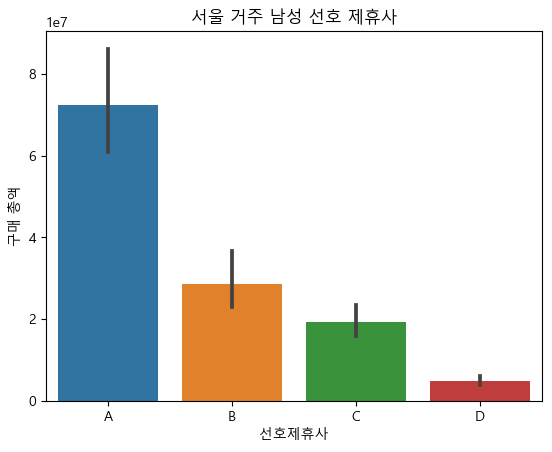

In [32]:
s = cd[(cd['성별']=='M')&(cd['거주지역']=='서울')]
s=s.sort_values(by='선호제휴사',ascending=True)
sns.barplot(data=s, x='선호제휴사', y= '구매 총액')
plt.title('서울 거주 남성 선호 제휴사')

<AxesSubplot:xlabel='선호제휴사', ylabel='구매 총액'>

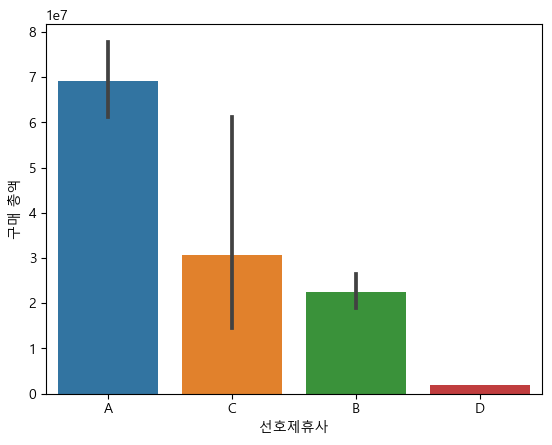

In [13]:
import seaborn as sns
sns.barplot(data=a, x='선호제휴사', y='구매 총액')

In [43]:
import matplotlib.pyplot as plt

Int64Index([0, 1], dtype='int64')
0    11319
1     8064
Name: 감소고객, dtype: int64


([<matplotlib.patches.Wedge at 0x156f708cbb0>,
 [Text(-0.2868098969192113, 1.0619510737454865, '증가'),
  Text(0.28680979749217456, -1.0619511005985625, '감소')],
 [Text(-0.15644176195593343, 0.5792460402248107, '58.4%'),
  Text(0.15644170772300428, -0.5792460548719431, '41.6%')])

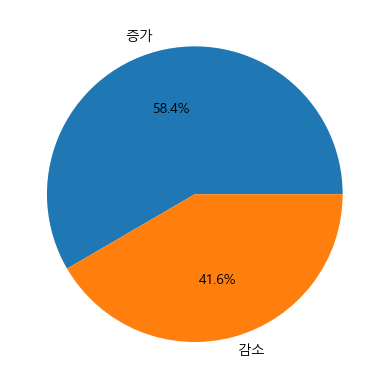

In [44]:
# count = cd['감소고객'].value_counts()
# count
# index = list(count.index)
# value = list(count)
# plt.pie(value, labels = index, autopct='%1.1f%%')
# plt.title('dd')

count = cd['감소고객'].value_counts()
index = count.index
value = count
print(index)
print(value)

plt.pie(value,labels=['증가','감소'],autopct='%1.1f%%')

Text(0.5, 1.0, '남자 노년')

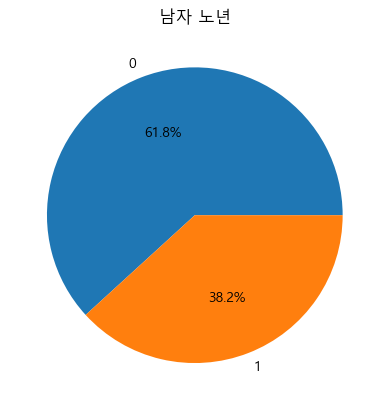

In [52]:
count = a['감소고객'].value_counts()
count
index = list(count.index)
value = list(count)
plt.pie(value, labels = index, autopct='%1.1f%%')
plt.title('남자 노년')

Text(0.5, 1.0, '2014, 2015 선호점포 상위 5개')

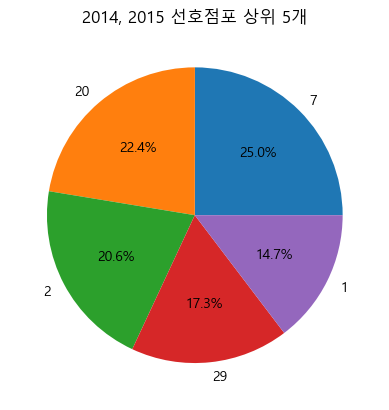

In [48]:
# count = cd['선호점포'].value_counts()
# index = list(count.index)[:5]
# value = list(count)[:5]
# a = plt.pie(value, labels=index, autopct='%1.1f%%')

count = cd['선호점포'].value_counts()
index = count.index[:5]
value = count[:5]

plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('2014, 2015 선호점포 상위 5개')

<AxesSubplot:>

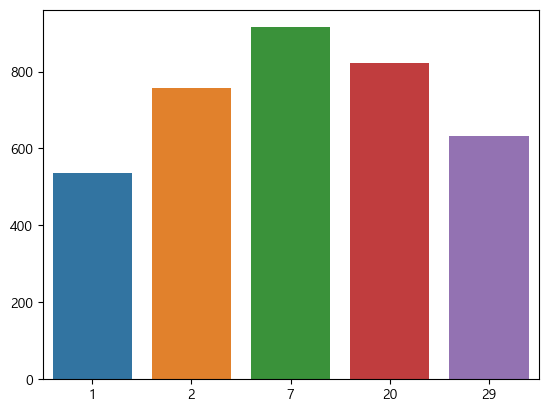

In [55]:
count = cd['선호점포'].value_counts()
index = list(count.index)[:5]
value = list(count)[:5]
sns.barplot(x= index, y=value)

([<matplotlib.patches.Wedge at 0x122391ccf40>,
 [Text(-0.917397544174156, 0.6069445987429394, '부산'),
  Text(0.9173974873478975, -0.6069446846358938, '충남')],
 [Text(-0.5003986604586305, 0.33106069022342144, '81.4%'),
  Text(0.5003986294624895, -0.3310607370741238, '18.6%')])

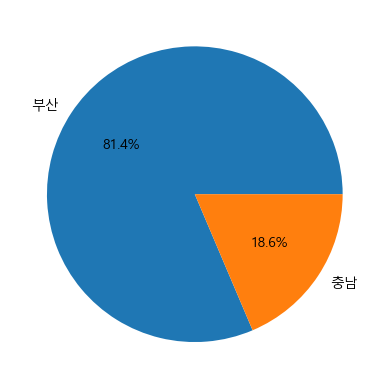

In [63]:
a = cd[(cd['선호점포']==100) & (cd['성별']=='F')]
count = a['거주지역'].value_counts()
index = list(count.index)[:5]
value = list(count)[:5]

plt.pie(value, labels=index, autopct='%1.1f%%')

In [2]:
import pickle

with open('../dataset/scustomerdata.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [3]:
cd = loaded_data

In [4]:
cd.head()

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
0,00752,M,노년층,울산,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,일상용품,패션잡화,가공식품,일상용품,패션잡화,가공식품,디지털/가전,패션잡화,일상용품,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55
1,00754,F,노년층,서울,2.0,13.0,13.0,NaN,A,2,A2,5648899.0,6560856.0,4868150.0,19591410.0,3494579.0,4871427.0,1973879.0,12647258.0,934973.0,-1768137.0,15505680.0,-16803490.0,1386354.0,-2915258.0,11151190.0,6,619,60431637,97627.85,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,7491312.0,0,2,10,3,3,116.14,74.20,402.44,17.84,139.40,40.52,640.73
2,00758,F,노년층,서울,37.0,54.0,NaN,NaN,A,37,A37,3879096.0,25507579.0,5745857.0,5290043.0,10555637.0,27922567.0,9408581.0,25724991.0,21522006.0,-19747326.0,-141111.0,4970621.0,17318743.0,-18571023.0,17414192.0,1,1124,114271870,101665.36,일상용품,가공식품,신선식품,가공식품,일상용품,신선식품,신선식품,가공식품,일상용품,22766102.0,0,1,7,2,2,657.57,22.53,92.07,199.54,264.53,33.70,273.42
3,00790,F,노년층,인천,30.0,34.0,18.0,NaN,B,34,B34,1021485.0,1336503.0,1335952.0,1321346.0,1378937.0,968753.0,780510.0,1264045.0,318305.0,-23952.0,61684.0,-2459.0,-400881.0,-200821.0,544904.0,1,1138,9406954,8266.22,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,기타,신선식품,가공식품,296780.0,0,1,7,10,8,130.84,99.96,98.91,104.36,70.25,80.57,161.95
4,00797,M,노년층,서울,10.0,24.0,286.0,NaN,A,10,A10,10953919.0,9346720.0,7984043.0,7383646.0,23995690.0,10502196.0,8228488.0,11137539.0,-1542916.0,-1494617.0,-161982.0,16099959.0,-13294611.0,-2404627.0,3481318.0,3,1666,89291771,53596.50,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,682524.0,0,1,5,2,3,85.33,85.42,92.48,324.98,43.77,78.35,135.35


In [ ]:
14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기

In [84]:
a = cd[cd['연령대']=='중년층']
dfa = a[['14_1분기','14_2분기','14_3분기','14_4분기','15_1분기','15_2분기','15_3분기','15_4분기']]
dfa

,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기
503,1486585.0,2076723.0,1991891.0,2211145.0,1939237.0,1673962.0,2229284.0,1872634.0
504,3091074.0,3006052.0,5015305.0,9370752.0,3744366.0,3100854.0,2408222.0,3871325.0
505,3701923.0,2187565.0,1845511.0,1405075.0,1990697.0,1616418.0,1821776.0,1592172.0
506,2337434.0,1922762.0,2217155.0,1489239.0,2273370.0,2018981.0,2146366.0,1633441.0
507,4790017.0,3141813.0,3308419.0,8162039.0,5156818.0,7647226.0,4424931.0,6082338.0
...,...,...,...,...,...,...,...,...
19375,21945584.0,42984489.0,5851401.0,55340649.0,44743707.0,87884845.0,4950513.0,33004586.0
19377,265831.0,296827.0,1123757.0,3082379.0,2705553.0,3727268.0,3671918.0,904010.0
19379,1474250.0,1862015.0,1687775.0,2384547.0,2136260.0,2681292.0,2812454.0,1635594.0
19380,1662316.0,2364411.0,1494838.0,1612621.0,1789685.0,1763338.0,2397244.0,2483323.0


In [70]:
# 중년층 매출금액이 8분기 모두 분기별 평균 이상인 고객들 (562명)
m1 = a['14_1분기'].mean()
m2 = a['14_2분기'].mean()
m3 = a['14_3분기'].mean()
m4 = a['14_4분기'].mean()
m5 = a['15_1분기'].mean()
m6 = a['15_2분기'].mean()
m7 = a['15_3분기'].mean()
m8 = a['15_4분기'].mean()


res = a[(a['14_1분기'] >= m1)&(a['14_2분기'] >= m2)&(a['14_3분기'] >= m3)&(a['14_4분기'] >= m4)
        &(a['15_1분기'] >= m5)&(a['15_2분기'] >= m6)&(a['15_3분기'] >= m7)&(a['15_4분기'] >= m8)]
res.head()

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
512,06845,F,중년층,부산,4.0,94.0,94.0,30.0,A,94,A94,11667293.0,5381131.0,5496421.0,6549462.0,5333689.0,11473714.0,8204162.0,6123019.0,-6191060.0,18326.0,1404914.0,-1497150.0,6131020.0,-3394246.0,-1680624.0,2,915,60059330,65638.61,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,-5208820.0,1,1,9,3,3,46.12,102.14,119.16,81.44,215.12,71.50,74.63
514,06861,F,중년층,울산,14.0,NaN,NaN,NaN,A,14,A14,5359984.0,6316114.0,4420000.0,20859908.0,11643253.0,7965105.0,7995528.0,11465204.0,977440.0,-1962510.0,17255170.0,-10054920.0,-3598350.0,-109830.0,4047690.0,8,690,76571370,110973.00,일상용품,패션잡화,가공식품,일상용품,가공식품,가구/인테리어,가공식품,패션잡화,일상용품,6554690.0,0,3,10,3,2,117.84,69.98,471.94,55.82,68.41,100.38,143.40
518,06931,M,중년층,광주,6.0,114.0,51.0,NaN,A,6,A6,6046830.0,8691458.0,6603374.0,9780464.0,6857348.0,17048411.0,4199267.0,8686519.0,2659551.0,-2191613.0,3665098.0,-3331301.0,10166112.0,-12847900.0,4881800.0,3,1291,68002225,52674.07,가공식품,일상용품,신선식품,일상용품,가공식품,신선식품,신선식품,일상용품,가공식품,3001747.0,0,1,7,3,4,143.74,75.98,148.11,70.11,248.62,24.63,206.86
520,06939,F,중년층,서울,12.0,11.0,96.0,NaN,A,12,A12,8950226.0,14425200.0,14203480.0,12529753.0,9705931.0,7953116.0,7372004.0,11489646.0,5487976.0,-469263.0,-914469.0,-3356728.0,-1693942.0,-706880.0,4681937.0,2,1316,86613236,65815.53,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,3028631.0,0,1,7,2,3,161.17,98.46,88.22,77.46,81.94,92.69,155.86
525,06976,F,중년층,경북,13.0,96.0,81.0,NaN,A,13,A13,35440958.0,38171367.0,24150930.0,38712728.0,33894671.0,33143834.0,36900741.0,35944903.0,2892221.0,-14361911.0,16447050.0,-6506890.0,-576510.0,3088560.0,1132530.0,1,806,276317091,342825.17,일상용품,가공식품,신선식품,일상용품,가공식품,신선식품,None,디지털/가전,일상용품,2115050.0,0,1,9,1,1,107.70,63.27,160.29,87.55,97.78,111.34,97.41


In [85]:
dfa

,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기
503,1486585.0,2076723.0,1991891.0,2211145.0,1939237.0,1673962.0,2229284.0,1872634.0
504,3091074.0,3006052.0,5015305.0,9370752.0,3744366.0,3100854.0,2408222.0,3871325.0
505,3701923.0,2187565.0,1845511.0,1405075.0,1990697.0,1616418.0,1821776.0,1592172.0
506,2337434.0,1922762.0,2217155.0,1489239.0,2273370.0,2018981.0,2146366.0,1633441.0
507,4790017.0,3141813.0,3308419.0,8162039.0,5156818.0,7647226.0,4424931.0,6082338.0
...,...,...,...,...,...,...,...,...
19375,21945584.0,42984489.0,5851401.0,55340649.0,44743707.0,87884845.0,4950513.0,33004586.0
19377,265831.0,296827.0,1123757.0,3082379.0,2705553.0,3727268.0,3671918.0,904010.0
19379,1474250.0,1862015.0,1687775.0,2384547.0,2136260.0,2681292.0,2812454.0,1635594.0
19380,1662316.0,2364411.0,1494838.0,1612621.0,1789685.0,1763338.0,2397244.0,2483323.0


In [113]:
a

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
503,06765,F,중년층,전북,23.0,119.0,175.0,NaN,B,119,B119,1486585.0,2076723.0,1991891.0,2211145.0,1939237.0,1673962.0,2229284.0,1872634.0,594156.0,-119235.0,341230.0,-368405.0,-254006.0,513033.0,-240689.0,1,2828,15463379,5467.96,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,466084.0,0,1,2,7,10,139.70,95.92,111.01,87.70,86.32,133.17,84.00
504,06786,F,중년층,서울,10.0,20.0,NaN,38.0,A,10,A10,3091074.0,3006052.0,5015305.0,9370752.0,3744366.0,3100854.0,2408222.0,3871325.0,-69027.0,1909690.0,4792400.0,-5986850.0,-620990.0,-730790.0,1651470.0,10,816,33777087,41393.49,일상용품,가공식품,디지털/가전,일상용품,가공식품,신선식품,디지털/가전,가공식품,일상용품,945903.0,0,3,9,4,4,97.25,166.84,186.84,39.96,82.81,77.66,160.75
505,06787,F,중년층,서울,10.0,44.0,297.0,NaN,B,44,B44,3701923.0,2187565.0,1845511.0,1405075.0,1990697.0,1616418.0,1821776.0,1592172.0,-1486979.0,-372394.0,-349394.0,516085.0,-362118.0,172246.0,-132729.0,2,2046,16094018,7866.09,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-2015283.0,1,1,4,7,9,59.09,84.36,76.13,141.68,81.20,112.70,87.40
506,06791,F,중년층,광주,6.0,114.0,50.0,NaN,C,50,C50,2337434.0,1922762.0,2217155.0,1489239.0,2273370.0,2018981.0,2146366.0,1633441.0,-400537.0,253836.0,-625326.0,708658.0,-241509.0,89040.0,-407064.0,2,2866,15970580,5572.43,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-622902.0,1,1,2,7,10,82.26,115.31,67.17,152.65,88.81,106.31,76.10
507,06794,F,중년층,서울,2.0,7.0,69.0,22.0,A,2,A2,4790017.0,3141813.0,3308419.0,8162039.0,5156818.0,7647226.0,4424931.0,6082338.0,-1614590.0,107675.0,5209471.0,-3339730.0,2501765.0,-3281055.0,1968324.0,1,1290,42848744,33216.08,일상용품,가공식품,신선식품,가공식품,일상용품,신선식품,신선식품,가공식품,일상용품,1551860.0,0,1,7,4,4,65.59,105.30,246.71,63.18,148.29,57.86,137.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19375,08868,F,중년층,서울,2.0,6.0,312.0,NaN,A,2,A2,21945584.0,42984489.0,5851401.0,55340649.0,44743707.0,87884845.0,4950513.0,33004586.0,21026450.0,-37019400.0,51514987.0,-12970967.0,43114312.0,-82538192.0,29296300.0,9,878,297984829,339390.47,신선식품,가공식품,일상용품,신선식품,가공식품,일상용품,교육/문화 용품,일상용품,가공식품,12423490.0,0,3,9,1,1,195.87,13.61,945.77,80.85,196.42,5.63,666.69
19377,15412,F,중년층,서울,2.0,7.0,69.0,NaN,A,2,A2,265831.0,296827.0,1123757.0,3082379.0,2705553.0,3727268.0,3671918.0,904010.0,32149.0,802428.0,2090075.0,-511368.0,1029333.0,-119357.0,-2651340.0,2,879,15746059,17913.61,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,교육/문화 용품,일상용품,가공식품,671920.0,0,1,9,7,6,111.66,378.59,274.29,87.77,137.76,98.51,24.62
19379,10182,F,중년층,전남,27.0,113.0,448.0,NaN,B,113,B113,1474250.0,1862015.0,1687775.0,2384547.0,2136260.0,2681292.0,2812454.0,1635594.0,392900.0,-202794.0,817568.0,-352838.0,552571.0,81126.0,-1055379.0,1,2945,16640802,5650.53,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,233154.0,0,1,2,7,10,126.30,90.64,141.28,89.59,125.51,104.89,58.16
19380,12743,F,중년층,서울,20.0,8.0,283.0,NaN,B,8,B8,1662316.0,2364411.0,1494838.0,1612621.0,1789685.0,1763338.0,2397244.0,2483323.0,706343.0,-890699.0,207725.0,102620.0,-17220.0,588218.0,226807.0,1,1753,15555311,8873.54,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,923794.0,0,1,5,7,8,142.24,63.22,107.88,110.98,98.53,135.95,103.59


In [157]:
# 중년층 매출금액이 5분기 이상 분기별 평균 이상인 고객들 (1037)
# 중년층 충성고객 sc
a = cd[cd['연령대']=='중년층']

quarterly_means = a.iloc[:,11:19].mean()
#print(quarterly_means,'\n')
#각 분기별 평균 이상인 분기 구하기
mean_threshold = 5  # 평균 이상인 분기 개수
satisfied_quarters = a.iloc[:, 11:19].apply(lambda x: x >= x.mean(), axis=1).sum(axis=1) >= mean_threshold

# 평균 이상인 분기를 가진 고객 선택
satisfied_customers = a[satisfied_quarters]

sc = satisfied_customers
sc.head(3)

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
503,06765,F,중년층,전북,23.0,119.0,175.0,NaN,B,119,B119,1486585.0,2076723.0,1991891.0,2211145.0,1939237.0,1673962.0,2229284.0,1872634.0,594156.0,-119235.0,341230.0,-368405.0,-254006.0,513033.0,-240689.0,1,2828,15463379,5467.96,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,466084.0,0,1,2,7,10,139.70,95.92,111.01,87.70,86.32,133.17,84.00
506,06791,F,중년층,광주,6.0,114.0,50.0,NaN,C,50,C50,2337434.0,1922762.0,2217155.0,1489239.0,2273370.0,2018981.0,2146366.0,1633441.0,-400537.0,253836.0,-625326.0,708658.0,-241509.0,89040.0,-407064.0,2,2866,15970580,5572.43,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-622902.0,1,1,2,7,10,82.26,115.31,67.17,152.65,88.81,106.31,76.10
508,06799,F,중년층,부산,29.0,94.0,223.0,NaN,B,94,B94,1221363.0,1875724.0,1827691.0,1648291.0,1555820.0,452696.0,328948.0,215881.0,656675.0,-79773.0,-80471.0,-165599.0,-1088900.0,-128790.0,-98020.0,4,2536,9096060,3586.77,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,기타,신선식품,가공식품,-984878.0,1,2,3,10,11,153.58,97.44,90.18,94.39,29.10,72.66,65.63


In [110]:
# sc1 = sc.transpose()
# sc1 = sc1.reset_index()
# sc1
#sns.barplot(data = sc1, x = 'index', y = 503)

1    782
2    163
3     78
4     14
Name: R 등급, dtype: int64


Text(0.5, 1.0, '중년층 충성고객의 R등급 비율')

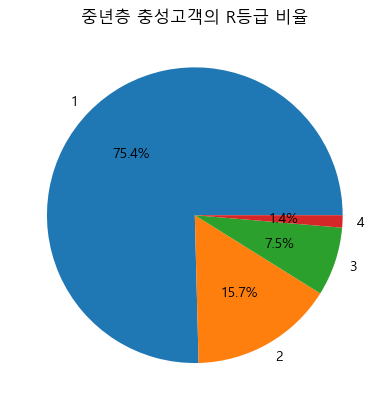

In [158]:
count = sc['R 등급'].value_counts()
print(count)
index = count.index
value = count

plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('중년층 충성고객의 R등급 비율')

Text(0.5, 1.0, '중년층 충성고객의 F등급 비율')

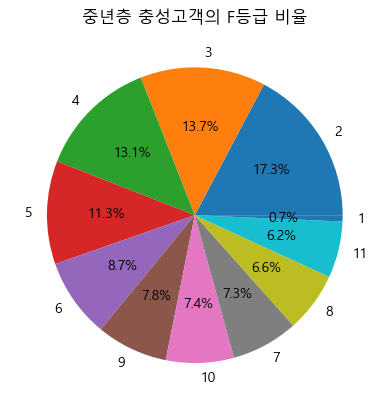

In [132]:
count = sc['F 등급'].value_counts()
index = count.index
value = count

plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('중년층 충성고객의 F등급 비율')

8     141
9     133
7     126
11    123
6     123
10    108
5      87
3      75
4      68
2      29
1      24
Name: M 등급, dtype: int64


Text(0.5, 1.0, '중년층 충성고객의 M등급 비율')

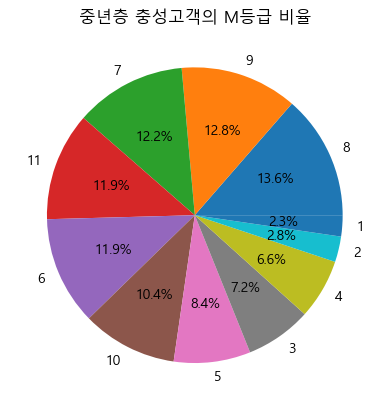

In [159]:
count = sc['M 등급'].value_counts()
print(count)
index = count.index
value = count

plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('중년층 충성고객의 M등급 비율')

In [136]:
# 중년층 충성고객의 R등급은 75%로, 높은 비율
# -> 제휴사별로 살펴보면

scr1 = sc[sc['R 등급']==1]
scr1.head()

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
503,06765,F,중년층,전북,23.0,119.0,175.0,NaN,B,119,B119,1486585.0,2076723.0,1991891.0,2211145.0,1939237.0,1673962.0,2229284.0,1872634.0,594156.0,-119235.0,341230.0,-368405.0,-254006.0,513033.0,-240689.0,1,2828,15463379,5467.96,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,466084.0,0,1,2,7,10,139.70,95.92,111.01,87.70,86.32,133.17,84.00
506,06791,F,중년층,광주,6.0,114.0,50.0,NaN,C,50,C50,2337434.0,1922762.0,2217155.0,1489239.0,2273370.0,2018981.0,2146366.0,1633441.0,-400537.0,253836.0,-625326.0,708658.0,-241509.0,89040.0,-407064.0,2,2866,15970580,5572.43,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-622902.0,1,1,2,7,10,82.26,115.31,67.17,152.65,88.81,106.31,76.10
509,06818,F,중년층,서울,2.0,13.0,109.0,NaN,B,13,B13,1019258.0,1016971.0,1055218.0,929678.0,1056235.0,897192.0,488144.0,350692.0,2837.0,19538.0,-69174.0,83375.0,-152821.0,-415218.0,-114086.0,2,1670,6787436,4064.33,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-645549.0,1,1,5,11,11,99.78,103.76,88.10,113.61,84.94,54.41,71.84
517,06886,F,중년층,인천,18.0,32.0,143.0,NaN,B,32,B32,1191146.0,1653650.0,1445049.0,1185662.0,1528390.0,1442414.0,1316115.0,760162.0,465784.0,-232703.0,-185182.0,285691.0,-77812.0,-148621.0,-499283.0,1,1779,10477067,5889.30,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-392126.0,1,1,5,9,10,138.83,87.39,82.05,128.91,94.37,91.24,57.76
523,06960,M,중년층,서울,20.0,8.0,121.0,NaN,B,8,B8,285342.0,365549.0,2235029.0,2964625.0,2616875.0,2956882.0,2146284.0,1683909.0,81171.0,1819439.0,882968.0,-477311.0,351149.0,-843480.0,-354794.0,2,2147,15260120,7107.65,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,1459142.0,0,1,3,7,9,128.11,611.42,132.64,88.27,112.99,72.59,78.46


Text(0.5, 1.0, '중년층 충성고객 R등급이 1인 고객들의 선호 제휴사 비율')

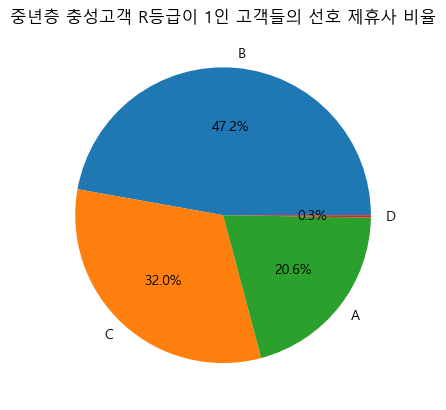

In [140]:
count = scr1['선호제휴사'].value_counts()
index = count.index
value = count

plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('중년층 충성고객 R등급이 1인 고객들의 선호 제휴사 비율')

Text(0.5, 1.0, '중년층 충성고객 R등급이 1인 고객들의 최근성 비율')

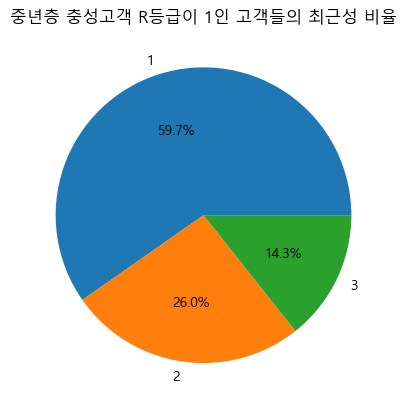

In [142]:
count = scr1['최근성'].value_counts()
index = count.index
value = count
plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('중년층 충성고객 R등급이 1인 고객들의 최근성 비율')

In [144]:
a = cd[cd['연령대']=='장년층']
a.head()

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
160,03023,M,장년층,대전,19.0,67.0,321.0,NaN,B,67,B67,1046296.0,988796.0,1811194.0,1456432.0,1463128.0,1474177.0,1251383.0,2218317.0,-51919.0,785879.0,-262768.0,-58877.0,18321.0,-243420.0,1071869.0,1,1187,11722149,9875.44,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,1259085.0,0,1,7,9,7,94.50,183.17,80.41,100.46,100.76,84.89,177.27
161,03028,F,장년층,인천,8.0,34.0,25.0,NaN,B,34,B34,1633610.0,1305743.0,1031041.0,979145.0,1017514.0,1076726.0,1277119.0,1156298.0,-317766.0,-291166.0,5595.0,-6082.0,63969.0,176852.0,-51539.0,2,1310,9453617,7216.50,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-420137.0,1,1,7,10,9,79.93,78.96,94.97,103.92,105.82,118.61,90.54
162,03053,F,장년층,서울,20.0,8.0,19.0,NaN,C,19,C19,2989727.0,2338783.0,2948835.0,2791465.0,2638326.0,2381917.0,1676529.0,1950317.0,-632163.0,554839.0,6752.0,-277021.0,-241687.0,-730653.0,379499.0,1,2856,19681333,6891.22,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-940434.0,1,1,2,6,9,78.23,126.08,94.66,94.51,90.28,70.39,116.33
163,03060,F,장년층,서울,20.0,8.0,99.0,17.0,C,99,C99,7428532.0,15769151.0,4603040.0,11117959.0,8942186.0,10171612.0,2812652.0,4904635.0,8329306.0,-11181740.0,7001894.0,-2652208.0,1267106.0,-7365390.0,2325064.0,4,794,65795198,82865.49,신선식품,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,가공식품,일상용품,-2275968.0,1,2,9,3,3,212.28,29.19,241.54,80.43,113.75,27.65,174.38
164,03066,F,장년층,서울,24.0,4.0,215.0,NaN,A,24,A24,4662364.0,5252653.0,6698596.0,8829179.0,10227925.0,10365300.0,3796885.0,11642375.0,610230.0,1320170.0,2588340.0,986510.0,187860.0,-6596690.0,8331550.0,4,695,61676840,88743.65,패션잡화,일상용품,가공식품,패션잡화,일상용품,가공식품,가공식품,일상용품,패션잡화,7427970.0,0,2,10,3,3,112.66,127.53,131.81,115.84,101.34,36.63,306.63


In [146]:
# 장년층 매출금액이 5분기 이상 분기별 평균 이상인 고객들 (1116)
# 장년층 충성고객 ssc

quarterly_means = a.iloc[:,11:19].mean()
#print(quarterly_means,'\n')
#각 분기별 평균 이상인 분기 구하기
mean_threshold = 5  # 평균 이상인 분기 개수
satisfied_quarters = a.iloc[:, 11:19].apply(lambda x: x >= x.mean(), axis=1).sum(axis=1) >= mean_threshold

# 평균 이상인 분기를 가진 고객 선택
satisfied_customers = a[satisfied_quarters]

ssc = satisfied_customers
print(ssc.count())
ssc.head(3)

고객번호        1116
성별          1116
연령대         1116
거주지역        1116
A선호점포       1096
B선호점포       1065
C선호점포       1002
D선호점포        208
선호제휴사       1116
선호점포        1116
선호제휴점포      1116
14_1분기      1116
14_2분기      1116
14_3분기      1116
14_4분기      1116
15_1분기      1116
15_2분기      1116
15_3분기      1116
15_4분기      1116
14_2분기변화    1088
14_3분기변화    1104
14_4분기변화    1112
15_1분기변화    1113
15_2분기변화    1113
15_3분기변화    1114
15_4분기변화    1113
최근성         1116
행동 빈도       1116
구매 총액       1116
평균구매액       1116
선호제품1       1116
선호제품2       1116
선호제품3       1114
선호제품14_1    1116
선호제품14_2    1116
선호제품14_3    1108
선호제품15_3    1101
선호제품15_2    1112
선호제품15_1    1114
분기 총변화      1082
감소고객        1116
R 등급        1116
F 등급        1116
M 등급        1116
AM 등급       1116
14_2변화율     1104
14_3변화율     1114
14_4변화율     1116
15_1변화율     1116
15_2변화율     1116
15_3변화율     1115
15_4변화율     1115
dtype: int64


,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
168,03122,F,장년층,부산,4.0,97.0,NaN,29.0,A,4,A4,4002991.0,12525976.0,7756734.0,11643681.0,3951258.0,9681090.0,16055961.0,11516754.0,8493434.0,-4877366.0,4465480.0,-8132720.0,5716284.0,6056466.0,-3771290.0,6,789,77153752,97786.76,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,교육/문화 용품,일상용품,가공식품,7950288.0,0,2,9,3,3,312.92,61.93,150.11,33.93,245.01,165.85,71.73
189,01854,F,장년층,서울,20.0,NaN,342.0,NaN,C,342,C342,2298594.0,2111743.0,2350568.0,1378480.0,2257231.0,2001664.0,2357886.0,3154173.0,-174237.0,196254.0,-870165.0,807233.0,-242760.0,312839.0,958998.0,2,3199,17881848,5589.82,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,988162.0,0,1,2,6,10,91.87,111.31,58.64,163.75,88.68,117.80,133.77
196,01923,F,장년층,서울,37.0,25.0,NaN,35.0,A,37,A37,3057111.0,5276779.0,3803725.0,1361125.0,1359591.0,203364.0,3185096.0,4722624.0,2222074.0,-1531116.0,-2307350.0,-62732.0,-1142678.0,2908571.0,1773089.0,2,798,22934197,28739.60,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,1859858.0,0,1,9,5,5,172.61,72.08,35.78,99.89,14.96,1566.20,148.27


Text(0.5, 1.0, '장년층 충성고객의 R등급 비율')

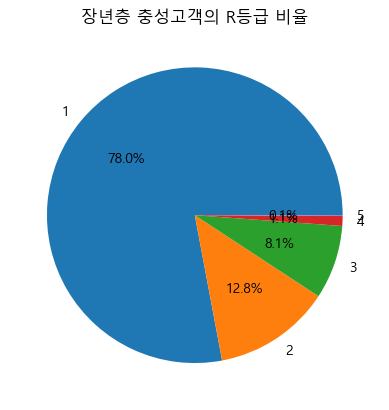

In [147]:
count = ssc['R 등급'].value_counts()
index = count.index
value = count

plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('장년층 충성고객의 R등급 비율')

Text(0.5, 1.0, '장년층 충성고객의 F등급 비율')

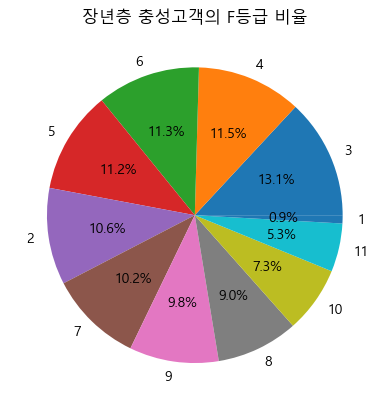

In [149]:
count = ssc['F 등급'].value_counts()
index = count.index
value = count

plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('장년층 충성고객의 F등급 비율')

Text(0.5, 1.0, '장년층 충성고객의 M등급 비율')

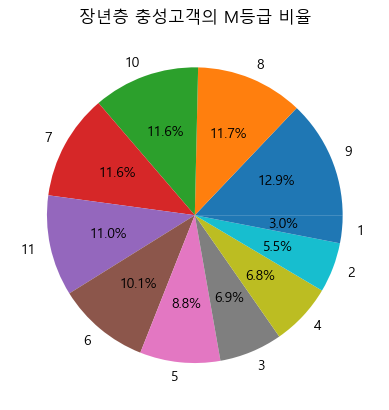

In [150]:
count = ssc['M 등급'].value_counts()
index = count.index
value = count

plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('장년층 충성고객의 M등급 비율')

In [151]:
# 장년층 충성고객의 R등급은 78%로, 높은 비율
# -> 제휴사별로 살펴보면

sscr1 = ssc[ssc['R 등급']==1]
sscr1.head()

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
189,01854,F,장년층,서울,20.0,NaN,342.0,NaN,C,342,C342,2298594.0,2111743.0,2350568.0,1378480.0,2257231.0,2001664.0,2357886.0,3154173.0,-174237.0,196254.0,-870165.0,807233.0,-242760.0,312839.0,958998.0,2,3199,17881848,5589.82,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,988162.0,0,1,2,6,10,91.87,111.31,58.64,163.75,88.68,117.80,133.77
196,01923,F,장년층,서울,37.0,25.0,NaN,35.0,A,37,A37,3057111.0,5276779.0,3803725.0,1361125.0,1359591.0,203364.0,3185096.0,4722624.0,2222074.0,-1531116.0,-2307350.0,-62732.0,-1142678.0,2908571.0,1773089.0,2,798,22934197,28739.60,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,1859858.0,0,1,9,5,5,172.61,72.08,35.78,99.89,14.96,1566.20,148.27
197,01928,F,장년층,부산,4.0,53.0,35.0,NaN,A,4,A4,3810563.0,4722838.0,1024094.0,3798105.0,3646212.0,3824799.0,2307531.0,5253511.0,926070.0,-3695150.0,2927570.0,-321060.0,195830.0,-1548860.0,3179180.0,2,648,28488310,43963.44,일상용품,가공식품,신선식품,일상용품,가공식품,신선식품,신선식품,일상용품,가공식품,1663580.0,0,1,10,5,4,123.94,21.68,370.87,96.00,104.90,60.33,227.67
200,01979,F,장년층,광주,6.0,112.0,50.0,NaN,A,6,A6,2277076.0,1862444.0,2285855.0,4245183.0,4455704.0,5113422.0,4724743.0,4101062.0,-400800.0,380900.0,2157600.0,17320.0,676230.0,-469190.0,-373400.0,1,692,29073190,42013.28,가공식품,일상용품,패션잡화,가공식품,일상용품,패션잡화,패션잡화,일상용품,가공식품,1988660.0,0,1,10,5,4,81.79,122.73,185.72,104.96,114.76,92.40,86.80
205,02020,F,장년층,서울,36.0,41.0,40.0,NaN,C,40,C40,1642244.0,2423481.0,1317607.0,2047212.0,2417104.0,2215658.0,2704394.0,2584075.0,784923.0,-1122519.0,830245.0,273814.0,-188153.0,438511.0,31018.0,1,1835,17344993,9452.31,신선식품,가공식품,일상용품,가공식품,신선식품,일상용품,일상용품,가공식품,신선식품,1047839.0,0,1,4,7,7,147.57,54.37,155.37,118.07,91.67,122.06,95.55


Text(0.5, 1.0, '장년층 충성고객 R등급이 1인 고객들의 선호 제휴사 비율')

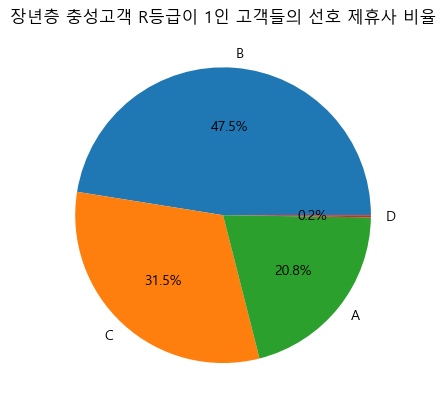

In [152]:
count = sscr1['선호제휴사'].value_counts()
index = count.index
value = count

plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('장년층 충성고객 R등급이 1인 고객들의 선호 제휴사 비율')

Text(0.5, 1.0, '장년층 충성고객 R등급이 1인 고객들의 최근성 비율')

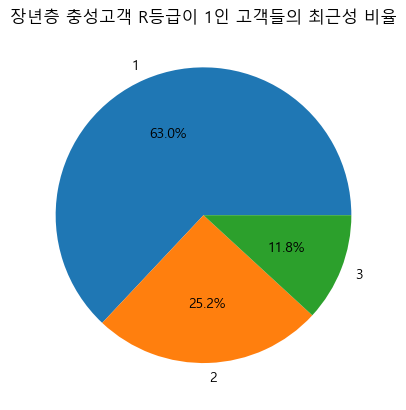

In [154]:
count = sscr1['최근성'].value_counts()
index = count.index
value = count
plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('장년층 충성고객 R등급이 1인 고객들의 최근성 비율')

In [162]:
cd.head()

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
0,00752,M,노년층,울산,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,일상용품,패션잡화,가공식품,일상용품,패션잡화,가공식품,디지털/가전,패션잡화,일상용품,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55
1,00754,F,노년층,서울,2.0,13.0,13.0,NaN,A,2,A2,5648899.0,6560856.0,4868150.0,19591410.0,3494579.0,4871427.0,1973879.0,12647258.0,934973.0,-1768137.0,15505680.0,-16803490.0,1386354.0,-2915258.0,11151190.0,6,619,60431637,97627.85,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,7491312.0,0,2,10,3,3,116.14,74.20,402.44,17.84,139.40,40.52,640.73
2,00758,F,노년층,서울,37.0,54.0,NaN,NaN,A,37,A37,3879096.0,25507579.0,5745857.0,5290043.0,10555637.0,27922567.0,9408581.0,25724991.0,21522006.0,-19747326.0,-141111.0,4970621.0,17318743.0,-18571023.0,17414192.0,1,1124,114271870,101665.36,일상용품,가공식품,신선식품,가공식품,일상용품,신선식품,신선식품,가공식품,일상용품,22766102.0,0,1,7,2,2,657.57,22.53,92.07,199.54,264.53,33.70,273.42
3,00790,F,노년층,인천,30.0,34.0,18.0,NaN,B,34,B34,1021485.0,1336503.0,1335952.0,1321346.0,1378937.0,968753.0,780510.0,1264045.0,318305.0,-23952.0,61684.0,-2459.0,-400881.0,-200821.0,544904.0,1,1138,9406954,8266.22,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,기타,신선식품,가공식품,296780.0,0,1,7,10,8,130.84,99.96,98.91,104.36,70.25,80.57,161.95
4,00797,M,노년층,서울,10.0,24.0,286.0,NaN,A,10,A10,10953919.0,9346720.0,7984043.0,7383646.0,23995690.0,10502196.0,8228488.0,11137539.0,-1542916.0,-1494617.0,-161982.0,16099959.0,-13294611.0,-2404627.0,3481318.0,3,1666,89291771,53596.50,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,682524.0,0,1,5,2,3,85.33,85.42,92.48,324.98,43.77,78.35,135.35


In [199]:
#연령대별 구매총액의 비율

cd_age =cd.groupby('연령대')['구매 총액'].sum().reset_index()
cd_age
# agedf = cd_age.drop('연령대',axis=1, inplace=False)
# agedf
# count = cd_age.value_counts()
# count

,연령대,구매 총액
0,노년층,134841519095
1,장년층,241656031967
2,중년층,226839682186
3,청년층,69751933306
4,학생층,3929990387


In [166]:
cd['연령대'].value_counts()

장년층    7196
중년층    6446
노년층    3094
청년층    2364
학생층     283
Name: 연령대, dtype: int64

Text(0.5, 1.0, '연령대별 매출 비율')

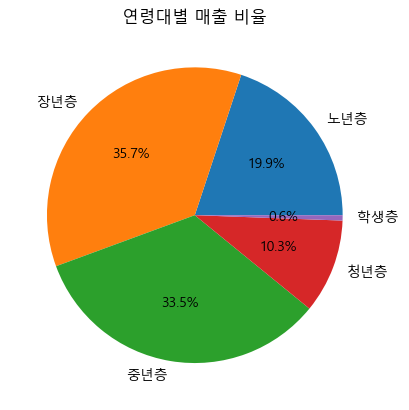

In [201]:
index = ['노년층', '장년층', '중년층', '청년층', '학생층']
value = [134841519095, 241656031967,226839682186,69751933306 ,3929990387]
plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('연령대별 매출 비율')

In [202]:
cd

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
0,00752,M,노년층,울산,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,일상용품,패션잡화,가공식품,일상용품,패션잡화,가공식품,디지털/가전,패션잡화,일상용품,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55
1,00754,F,노년층,서울,2.0,13.0,13.0,NaN,A,2,A2,5648899.0,6560856.0,4868150.0,19591410.0,3494579.0,4871427.0,1973879.0,12647258.0,934973.0,-1768137.0,15505680.0,-16803490.0,1386354.0,-2915258.0,11151190.0,6,619,60431637,97627.85,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,7491312.0,0,2,10,3,3,116.14,74.20,402.44,17.84,139.40,40.52,640.73
2,00758,F,노년층,서울,37.0,54.0,NaN,NaN,A,37,A37,3879096.0,25507579.0,5745857.0,5290043.0,10555637.0,27922567.0,9408581.0,25724991.0,21522006.0,-19747326.0,-141111.0,4970621.0,17318743.0,-18571023.0,17414192.0,1,1124,114271870,101665.36,일상용품,가공식품,신선식품,가공식품,일상용품,신선식품,신선식품,가공식품,일상용품,22766102.0,0,1,7,2,2,657.57,22.53,92.07,199.54,264.53,33.70,273.42
3,00790,F,노년층,인천,30.0,34.0,18.0,NaN,B,34,B34,1021485.0,1336503.0,1335952.0,1321346.0,1378937.0,968753.0,780510.0,1264045.0,318305.0,-23952.0,61684.0,-2459.0,-400881.0,-200821.0,544904.0,1,1138,9406954,8266.22,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,기타,신선식품,가공식품,296780.0,0,1,7,10,8,130.84,99.96,98.91,104.36,70.25,80.57,161.95
4,00797,M,노년층,서울,10.0,24.0,286.0,NaN,A,10,A10,10953919.0,9346720.0,7984043.0,7383646.0,23995690.0,10502196.0,8228488.0,11137539.0,-1542916.0,-1494617.0,-161982.0,16099959.0,-13294611.0,-2404627.0,3481318.0,3,1666,89291771,53596.50,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,682524.0,0,1,5,2,3,85.33,85.42,92.48,324.98,43.77,78.35,135.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,10710,F,장년층,서울,9.0,9.0,168.0,NaN,C,168,C168,1142944.0,1033377.0,1248191.0,1036245.0,1129233.0,1024356.0,1542873.0,1373313.0,-103198.0,191696.0,-147437.0,45377.0,-98604.0,488468.0,-86666.0,1,2573,9511035,3696.48,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,289636.0,0,1,2,10,11,90.41,120.79,83.02,108.97,90.71,150.62,89.01
19379,10182,F,중년층,전남,27.0,113.0,448.0,NaN,B,113,B113,1474250.0,1862015.0,1687775.0,2384547.0,2136260.0,2681292.0,2812454.0,1635594.0,392900.0,-202794.0,817568.0,-352838.0,552571.0,81126.0,-1055379.0,1,2945,16640802,5650.53,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,233154.0,0,1,2,7,10,126.30,90.64,141.28,89.59,125.51,104.89,58.16
19380,12743,F,중년층,서울,20.0,8.0,283.0,NaN,B,8,B8,1662316.0,2364411.0,1494838.0,1612621.0,1789685.0,1763338.0,2397244.0,2483323.0,706343.0,-890699.0,207725.0,102620.0,-17220.0,588218.0,226807.0,1,1753,15555311,8873.54,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,923794.0,0,1,5,7,8,142.24,63.22,107.88,110.98,98.53,135.95,103.59
19381,16092,F,장년층,대전,11.0,76.0,194.0,NaN,B,76,B76,1593739.0,1916767.0,1672931.0,1818012.0,1915502.0,1649394.0,2695027.0,2382313.0,329139.0,-271725.0,246191.0,14672.0,-254954.0,992330.0,-168483.0,1,3028,15626325,5160.61,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,887170.0,0,1,2,7,10,120.27,87.28,108.67,105.36,86.11,163.39,88.40


In [ ]:
#a = cd[(cd['연령대']=='중년층')]

In [204]:
# 전 연령대 충성고객 2970명 scc

quarterly_means = cd.iloc[:,11:19].mean()
#print(quarterly_means,'\n')
#각 분기별 평균 이상인 분기 구하기
mean_threshold = 5  # 평균 이상인 분기 개수
satisfied_quarters = cd.iloc[:, 11:19].apply(lambda x: x >= x.mean(), axis=1).sum(axis=1) >= mean_threshold

# 평균 이상인 분기를 가진 고객 선택
satisfied_customers = cd[satisfied_quarters]

scc = satisfied_customers
print(scc.count())
scc.head(3)

고객번호        2970
성별          2970
연령대         2970
거주지역        2970
A선호점포       2920
B선호점포       2851
C선호점포       2674
D선호점포        552
선호제휴사       2970
선호점포        2970
선호제휴점포      2970
14_1분기      2970
14_2분기      2970
14_3분기      2970
14_4분기      2970
15_1분기      2970
15_2분기      2970
15_3분기      2970
15_4분기      2970
14_2분기변화    2877
14_3분기변화    2930
14_4분기변화    2957
15_1분기변화    2966
15_2분기변화    2965
15_3분기변화    2964
15_4분기변화    2962
최근성         2970
행동 빈도       2970
구매 총액       2970
평균구매액       2970
선호제품1       2970
선호제품2       2969
선호제품3       2953
선호제품14_1    2969
선호제품14_2    2957
선호제품14_3    2925
선호제품15_3    2918
선호제품15_2    2958
선호제품15_1    2966
분기 총변화      2863
감소고객        2970
R 등급        2970
F 등급        2970
M 등급        2970
AM 등급       2970
14_2변화율     2938
14_3변화율     2962
14_4변화율     2970
15_1변화율     2970
15_2변화율     2970
15_3변화율     2969
15_4변화율     2969
dtype: int64


,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
3,00790,F,노년층,인천,30.0,34.0,18.0,NaN,B,34,B34,1021485.0,1336503.0,1335952.0,1321346.0,1378937.0,968753.0,780510.0,1264045.0,318305.0,-23952.0,61684.0,-2459.0,-400881.0,-200821.0,544904.0,1,1138,9406954,8266.22,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,기타,신선식품,가공식품,296780.0,0,1,7,10,8,130.84,99.96,98.91,104.36,70.25,80.57,161.95
11,00880,F,노년층,부산,29.0,107.0,NaN,NaN,B,107,B107,1669350.0,1043677.0,1649462.0,2010143.0,1116889.0,1580285.0,1638626.0,1087577.0,-613660.0,573361.0,467802.0,-973977.0,466298.0,29294.0,-475675.0,2,1618,11779535,7280.31,신선식품,가공식품,일상용품,신선식품,가공식품,일상용품,일상용품,가공식품,신선식품,-526557.0,1,1,5,9,9,62.52,158.04,121.87,55.56,141.49,103.69,66.37
14,00905,F,노년층,부산,4.0,NaN,94.0,NaN,A,4,A4,6082028.0,8006153.0,5232090.0,6346113.0,5484058.0,6600890.0,200080.0,0.0,1943419.0,-2849574.0,1452785.0,-1138120.0,1137828.0,-6367048.0,NaN,116,681,37830872,55551.94,일상용품,신선식품,가공식품,일상용품,신선식품,가공식품,가공식품,신선식품,일상용품,NaN,0,4,10,4,3,131.64,65.35,121.29,86.42,120.37,3.03,0.00


In [209]:
bb = scc[scc['선호제휴사']=='B']
bb.head(2)

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
3,00790,F,노년층,인천,30.0,34.0,18.0,NaN,B,34,B34,1021485.0,1336503.0,1335952.0,1321346.0,1378937.0,968753.0,780510.0,1264045.0,318305.0,-23952.0,61684.0,-2459.0,-400881.0,-200821.0,544904.0,1,1138,9406954,8266.22,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,기타,신선식품,가공식품,296780.0,0,1,7,10,8,130.84,99.96,98.91,104.36,70.25,80.57,161.95
11,00880,F,노년층,부산,29.0,107.0,NaN,NaN,B,107,B107,1669350.0,1043677.0,1649462.0,2010143.0,1116889.0,1580285.0,1638626.0,1087577.0,-613660.0,573361.0,467802.0,-973977.0,466298.0,29294.0,-475675.0,2,1618,11779535,7280.31,신선식품,가공식품,일상용품,신선식품,가공식품,일상용품,일상용품,가공식품,신선식품,-526557.0,1,1,5,9,9,62.52,158.04,121.87,55.56,141.49,103.69,66.37


Text(0.5, 1.0, '선호제휴사 B 고객 R등급 비율')

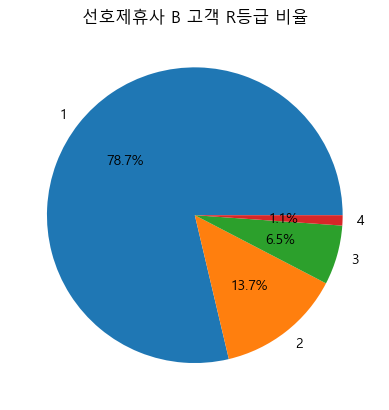

In [214]:
count = bb['R 등급'].value_counts()
index = count.index
value = count
plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('선호제휴사 B 고객 R등급 비율')

Text(0.5, 1.0, '선호제휴사 B 고객 F등급 비율')

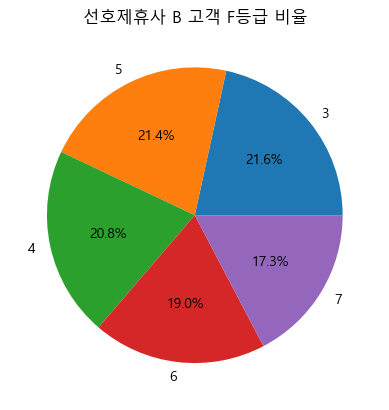

In [262]:
count = bb['F 등급'].value_counts()[:5]
count
index = count.index
value = count
plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('선호제휴사 B 고객 F등급 비율')

Text(0.5, 1.0, '선호제휴사 B 고객 M등급 비율')

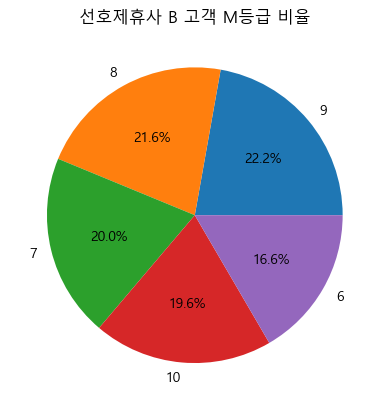

In [216]:
count = bb['M 등급'].value_counts()[:5]
index = count.index
value = count
plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('선호제휴사 B 고객 M등급 비율')

In [232]:
# 선호제휴사가 b인 감소고객 dc, 594명
dc = bb[bb['감소고객']==1]
print(dc['고객번호'].count())
dc.head()

594


,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
11,00880,F,노년층,부산,29.0,107.0,NaN,NaN,B,107,B107,1669350.0,1043677.0,1649462.0,2010143.0,1116889.0,1580285.0,1638626.0,1087577.0,-613660.0,573361.0,467802.0,-973977.0,466298.0,29294.0,-475675.0,2,1618,11779535,7280.31,신선식품,가공식품,일상용품,신선식품,가공식품,일상용품,일상용품,가공식품,신선식품,-526557.0,1,1,5,9,9,62.52,158.04,121.87,55.56,141.49,103.69,66.37
43,01209,F,노년층,서울,3.0,11.0,1.0,NaN,B,11,B11,4132035.0,3533469.0,3441409.0,2741275.0,2997965.0,3576497.0,3018558.0,3649931.0,-574362.0,-151815.0,-526227.0,130623.0,590197.0,-607574.0,826428.0,2,1361,27039868,19867.65,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-312730.0,1,1,6,5,5,85.51,97.39,79.66,109.36,119.30,84.40,120.92
68,00260,F,노년층,서울,2.0,7.0,69.0,NaN,B,7,B7,1966524.0,2133673.0,2009379.0,1922063.0,940864.0,816925.0,1374692.0,1758712.0,176036.0,-158773.0,25199.0,-1057008.0,-118499.0,530436.0,476144.0,1,1441,12920808,8966.56,신선식품,가공식품,일상용품,가공식품,신선식품,일상용품,일상용품,가공식품,신선식품,-126465.0,1,1,6,8,8,108.50,94.17,95.65,48.95,86.83,168.28,127.93
159,01746,F,노년층,서울,7.0,58.0,427.0,33.0,B,58,B58,3031340.0,2661278.0,2259085.0,1862541.0,2209442.0,2128542.0,735487.0,699553.0,-352708.0,-439429.0,-280232.0,259377.0,-69350.0,-1397829.0,5114.0,7,1794,15520152,8651.14,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-2275057.0,1,2,5,7,8,87.79,84.89,82.45,118.63,96.34,34.55,95.11
188,01841,F,노년층,서울,44.0,2.0,NaN,7.0,B,2,B2,4285877.0,5897501.0,4563503.0,4403854.0,5203201.0,2751666.0,5037881.0,3868.0,1623731.0,-1406180.0,97204.0,592628.0,-2411171.0,2184644.0,-4916289.0,24,1067,31920519,29916.14,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-4235433.0,1,3,8,5,5,137.60,77.38,96.50,118.15,52.88,183.08,0.08


In [230]:
c = dc[['선호제품14_1','선호제품14_2','선호제품14_3']].value_counts().reset_index()
c

,선호제품14_1,선호제품14_2,선호제품14_3,0
0,가공식품,신선식품,일상용품,432
1,신선식품,가공식품,일상용품,79
2,가공식품,일상용품,신선식품,62
3,일상용품,가공식품,신선식품,6
4,가공식품,일상용품,교육/문화 용품,5
5,가공식품,신선식품,기타,2
6,가공식품,일상용품,의류,2
7,가공식품,기타,일상용품,1
8,가공식품,신선식품,의류,1
9,가공식품,신선식품,패션잡화,1


In [231]:
c[0].sum()

594

In [270]:
p14_1 = dc[['선호제품14_1']].value_counts().reset_index()
p14_1
# count = p14_1.value_counts()
# index = count.index
# value = count
# plt.pie(value, labels=index, autopct='%1.1f%%')
# plt.title('선호제휴사 B 고객 F등급 비율')

,선호제품14_1,0
0,가공식품,506
1,신선식품,79
2,일상용품,8
3,기타,1


Text(0.5, 1.0, '14년도 선호상품 1')

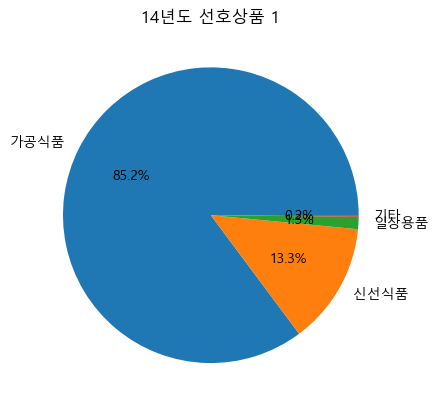

In [273]:
# data = {'선호제품':['가공식품', '신선식품', '일상용품', '기타'],
#            '합계':[506,79,8,1]}

index = ['가공식품', '신선식품', '일상용품', '기타']
value = [506,79,8,1]
plt.pie(value, labels = index, autopct='%1.1f%%')
plt.title('14년도 선호상품 1')

In [257]:
p15_1=dc[['선호제품15_1']].value_counts().reset_index()
p15_1

,선호제품15_1,0
0,가공식품,480
1,신선식품,105
2,일상용품,8
3,기타,1


Text(0.5, 1.0, '15년도 선호상품 1')

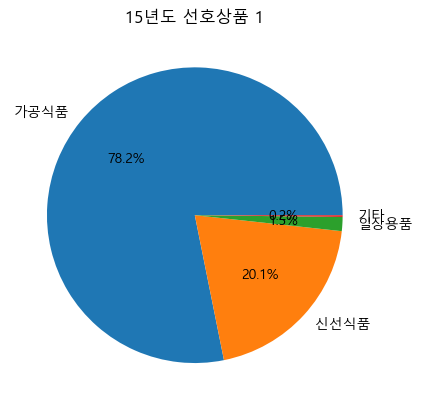

In [274]:
index = ['가공식품', '신선식품', '일상용품', '기타']
value = [408,105,8,1]
plt.pie(value, labels = index, autopct='%1.1f%%')
plt.title('15년도 선호상품 1')

In [240]:
p14_2 = dc[['선호제품14_2']].value_counts().reset_index()
p14_2

,선호제품14_2,0
0,신선식품,436
1,가공식품,88
2,일상용품,69
3,기타,1


In [243]:
p15_2 = dc[['선호제품15_2']].value_counts().reset_index()
p15_2

,선호제품15_2,0
0,신선식품,420
1,가공식품,114
2,일상용품,59
3,기타,1


In [241]:
p14_3=dc[['선호제품14_3']].value_counts().reset_index()
p14_3

,선호제품14_3,0
0,일상용품,512
1,신선식품,69
2,교육/문화 용품,6
3,의류,3
4,기타,2
5,패션잡화,2


In [244]:
p15_3=dc[['선호제품15_3']].value_counts().reset_index()
p15_3

,선호제품15_3,0
0,일상용품,508
1,신선식품,58
2,기타,13
3,교육/문화 용품,8
4,의류,6
5,의약품/의료기기,1


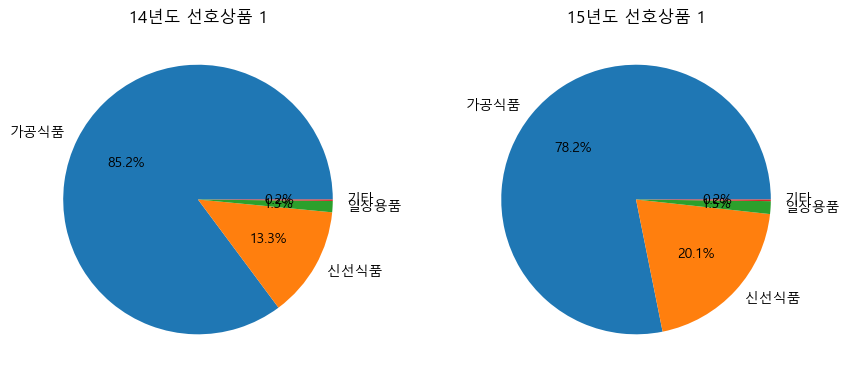

In [283]:
# B 감소고객 첫 번째 선호상품 연도별 비율 비교

# 첫 번째 파이차트
index1 = ['가공식품', '신선식품', '일상용품', '기타']
value1 = [506, 79, 8, 1]

fig, axs = plt.subplots(1, 2, figsize=(10,12))  # 1행 2열의 subplot

axs[0].pie(value1, labels=index1, autopct='%1.1f%%')
axs[0].set_title('14년도 선호상품 1')

# 두 번째 파이차트
index2 = ['가공식품', '신선식품', '일상용품', '기타']
value2 = [408, 105, 8, 1]

axs[1].pie(value2, labels=index2, autopct='%1.1f%%')
axs[1].set_title('15년도 선호상품 1')

# subplot 사이의 간격 조정
plt.subplots_adjust(wspace=0.3)

# 그래프 출력
plt.show()

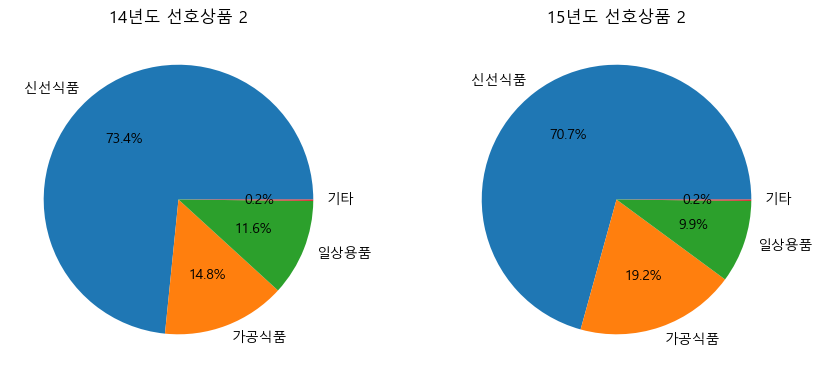

In [284]:
# B 감소고객 두 번째 선호상품 연도별 비율 비교

# 첫 번째 파이차트
index1 = ['신선식품', '가공식품', '일상용품', '기타']
value1 = [436, 88, 69, 1]

fig, axs = plt.subplots(1, 2, figsize=(10,12))  # 1행 2열의 subplot

axs[0].pie(value1, labels=index1, autopct='%1.1f%%')
axs[0].set_title('14년도 선호상품 2')

# 두 번째 파이차트
index2 = ['신선식품', '가공식품', '일상용품', '기타']
value2 = [420, 114, 59, 1]

axs[1].pie(value2, labels=index2, autopct='%1.1f%%')
axs[1].set_title('15년도 선호상품 2')

# subplot 사이의 간격 조정
plt.subplots_adjust(wspace=0.3)

# 그래프 출력
plt.show()

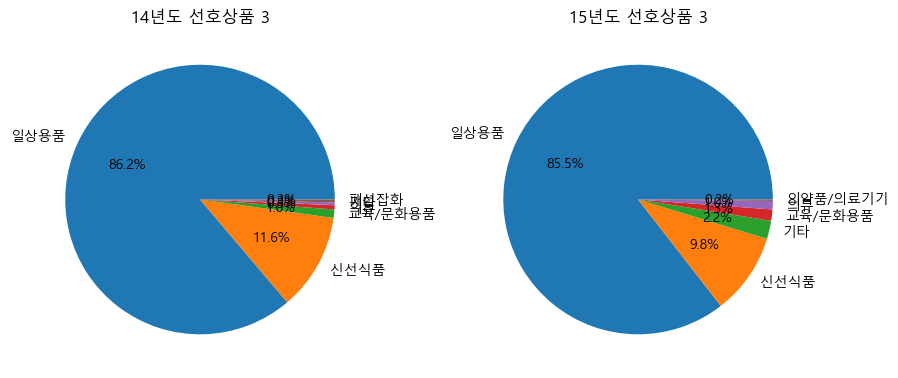

In [285]:
# B 감소고객 세 번째 선호상품 연도별 비율 비교

# 첫 번째 파이차트
index1 = ['일상용품', '신선식품', '교육/문화용품', '의류','기타','패션잡화']
value1 = [512,69,6,3,2,2]

fig, axs = plt.subplots(1, 2, figsize=(10,12))  # 1행 2열의 subplot

axs[0].pie(value1, labels=index1, autopct='%1.1f%%')
axs[0].set_title('14년도 선호상품 3')

# 두 번째 파이차트
index2 = ['일상용품', '신선식품', '기타', '교육/문화용품','의류','의약품/의료기기']
value2 = [508,58,13,8,6,1]

axs[1].pie(value2, labels=index2, autopct='%1.1f%%')
axs[1].set_title('15년도 선호상품 3')

# subplot 사이의 간격 조정
plt.subplots_adjust(wspace=0.3)

# 그래프 출력
plt.show()

In [289]:
cd['고객번호'].count()

19383

In [297]:
u = cd[cd['감소고객']==1]
bu = u[u['선호제휴사']=='B']
bu['고객번호'].count()

3441

Text(0.5, 1.0, '감소 고객의 선호 제휴사 비율')

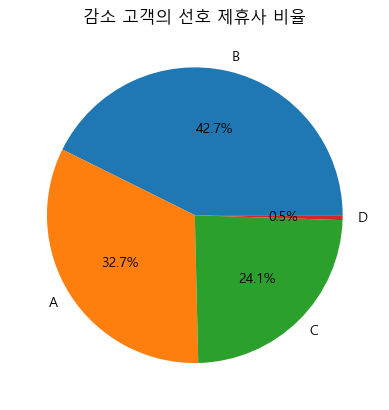

In [302]:
pu = u['선호제휴사'].value_counts()
index = pu.index
value = pu
plt.pie(value, labels=index, autopct='%1.1f%%')
plt.title('감소 고객의 선호 제휴사 비율')

In [304]:
cd.head(3)

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
0,00752,M,노년층,울산,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,일상용품,패션잡화,가공식품,일상용품,패션잡화,가공식품,디지털/가전,패션잡화,일상용품,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55
1,00754,F,노년층,서울,2.0,13.0,13.0,NaN,A,2,A2,5648899.0,6560856.0,4868150.0,19591410.0,3494579.0,4871427.0,1973879.0,12647258.0,934973.0,-1768137.0,15505680.0,-16803490.0,1386354.0,-2915258.0,11151190.0,6,619,60431637,97627.85,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,7491312.0,0,2,10,3,3,116.14,74.20,402.44,17.84,139.40,40.52,640.73
2,00758,F,노년층,서울,37.0,54.0,NaN,NaN,A,37,A37,3879096.0,25507579.0,5745857.0,5290043.0,10555637.0,27922567.0,9408581.0,25724991.0,21522006.0,-19747326.0,-141111.0,4970621.0,17318743.0,-18571023.0,17414192.0,1,1124,114271870,101665.36,일상용품,가공식품,신선식품,가공식품,일상용품,신선식품,신선식품,가공식품,일상용품,22766102.0,0,1,7,2,2,657.57,22.53,92.07,199.54,264.53,33.70,273.42


In [306]:
dc.head(3)

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
11,00880,F,노년층,부산,29.0,107.0,NaN,NaN,B,107,B107,1669350.0,1043677.0,1649462.0,2010143.0,1116889.0,1580285.0,1638626.0,1087577.0,-613660.0,573361.0,467802.0,-973977.0,466298.0,29294.0,-475675.0,2,1618,11779535,7280.31,신선식품,가공식품,일상용품,신선식품,가공식품,일상용품,일상용품,가공식품,신선식품,-526557.0,1,1,5,9,9,62.52,158.04,121.87,55.56,141.49,103.69,66.37
43,01209,F,노년층,서울,3.0,11.0,1.0,NaN,B,11,B11,4132035.0,3533469.0,3441409.0,2741275.0,2997965.0,3576497.0,3018558.0,3649931.0,-574362.0,-151815.0,-526227.0,130623.0,590197.0,-607574.0,826428.0,2,1361,27039868,19867.65,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-312730.0,1,1,6,5,5,85.51,97.39,79.66,109.36,119.30,84.40,120.92
68,00260,F,노년층,서울,2.0,7.0,69.0,NaN,B,7,B7,1966524.0,2133673.0,2009379.0,1922063.0,940864.0,816925.0,1374692.0,1758712.0,176036.0,-158773.0,25199.0,-1057008.0,-118499.0,530436.0,476144.0,1,1441,12920808,8966.56,신선식품,가공식품,일상용품,가공식품,신선식품,일상용품,일상용품,가공식품,신선식품,-126465.0,1,1,6,8,8,108.50,94.17,95.65,48.95,86.83,168.28,127.93


In [ ]:
분기총변화가 음수면 구매감소 1
분기총변화의 범위를 확인 후 등급화 해보기

In [309]:
dc['분기 총변화'].describe()

count    5.940000e+02
mean    -1.135663e+06
std      5.635082e+06
min     -1.345015e+08
25%     -1.115731e+06
50%     -5.378245e+05
75%     -2.328392e+05
max     -5.430000e+02
Name: 분기 총변화, dtype: float64

In [323]:
se = cd[cd['분기 총변화'] < -100000000]
se

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
8830,14323,M,중년층,서울,49.0,26.0,205.0,NaN,B,26,B26,254610152.0,181280040.0,1018029.0,1012357.0,2902306.0,1986361.0,1092531.0,1746634.0,-71626486.0,-179230304.0,52649.0,1823939.0,-896059.0,-907766.0,739229.0,5,1891,441835751,233651.90,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-250044798.0,1,2,4,1,1,71.20,0.56,99.44,286.69,68.44,55.00,159.87
10372,07957,M,중년층,서울,36.0,41.0,253.0,NaN,B,41,B41,558591276.0,841388457.0,626204082.0,99313022.0,30042861.0,9053.0,1707618.0,189723.0,283951554.0,-224902130.0,-508884240.0,-72985960.0,-29708300.0,1658760.0,-1471560.0,89,841,2134908726,2538535.94,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-552341876.0,1,4,9,1,1,150.63,74.43,15.86,30.25,0.03,18862.45,11.11
11922,10487,M,장년층,서울,17.0,13.0,1.0,NaN,B,13,B13,328128176.0,64625963.0,102487949.0,81243944.0,16166287.0,266602.0,22519951.0,55673925.0,-260322710.0,35846030.0,-16078360.0,-68026260.0,-15726050.0,21729250.0,35580160.0,12,476,668760080,1404958.15,가공식품,일상용품,의약품/의료기기,가공식품,일상용품,의약품/의료기기,신선식품,일상용품,가공식품,-266997940.0,1,3,11,1,1,19.70,158.59,79.27,19.90,1.65,8447.03,247.22
13043,11763,M,중년층,서울,35.0,9.0,300.0,15.0,B,9,B9,151759412.0,168457451.0,269559815.0,11779134.0,153762895.0,36443063.0,116021097.0,15097980.0,17361775.0,95791229.0,-251086631.0,139915399.0,-115865756.0,77082103.0,-97699605.0,22,662,910294485,1375067.20,일상용품,가공식품,신선식품,일상용품,가공식품,신선식품,신선식품,일상용품,가공식품,-134501486.0,1,3,10,1,1,111.00,160.02,4.37,1305.38,23.70,318.36,13.01
16713,07862,F,중년층,서울,17.0,NaN,197.0,NaN,A,17,A17,113088317.0,89822732.0,4638694.0,10936086.0,6774260.0,5469241.0,4538915.0,2935491.0,-22563074.0,-84769336.0,6778990.0,-4608560.0,-1263453.0,-1004427.0,-1397270.0,4,685,236609333,345415.08,가공식품,신선식품,일상용품,일상용품,가공식품,신선식품,일상용품,가공식품,신선식품,-108827130.0,1,2,10,1,1,79.43,5.16,235.76,61.94,80.74,82.99,64.67
17329,06207,F,중년층,인천,18.0,30.0,4.0,NaN,B,30,B30,631671679.0,395039920.0,216174327.0,26563292.0,103840169.0,85114324.0,104756787.0,169414569.0,-232086666.0,-181611394.0,-183658400.0,75244820.0,-18096138.0,17692838.0,72886256.0,3,1322,1721008092,1301821.55,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,-449628684.0,1,1,7,1,1,62.54,54.72,12.29,390.92,81.97,123.08,161.72
17672,06012,F,중년층,서울,3.0,11.0,112.0,NaN,A,3,A3,139031592.0,60689252.0,39780780.0,59076502.0,118461069.0,43461215.0,4664337.0,18585054.0,-77189070.0,-21483666.0,22240956.0,56084170.0,-73969190.0,-38652706.0,14664026.0,1,903,481966778,533739.51,일상용품,가공식품,의약품/의료기기,일상용품,가공식품,의약품/의료기기,교육/문화 용품,가공식품,일상용품,-118305480.0,1,1,9,1,1,43.65,65.55,148.51,200.52,36.69,10.73,398.45


In [326]:
se['고객번호'].count()

7

In [338]:
a = cd[cd['분기 총변화'] < -50000000]
a[['고객번호','분기 총변화','구매 총액','평균구매액']]

,고객번호,분기 총변화,구매 총액,평균구매액
612,06454,-58339500.0,162303690,227316.09
1021,12400,-57746590.0,144858530,197894.17
1634,17456,-51525509.0,314194542,226039.24
1833,00097,-81437750.0,979553906,599849.30
1929,01984,-56395110.0,148721380,252498.10
3509,02348,-75692949.0,1066755417,894178.89
4343,02720,-52705850.0,126930593,194678.82
8830,14323,-250044798.0,441835751,233651.90
9072,09518,-62950470.0,530812607,674475.99
9312,03890,-88589190.0,361983690,667866.59


In [341]:
a['분기 총변화'].sum()

-3096764052.0

In [340]:
len(a)

25

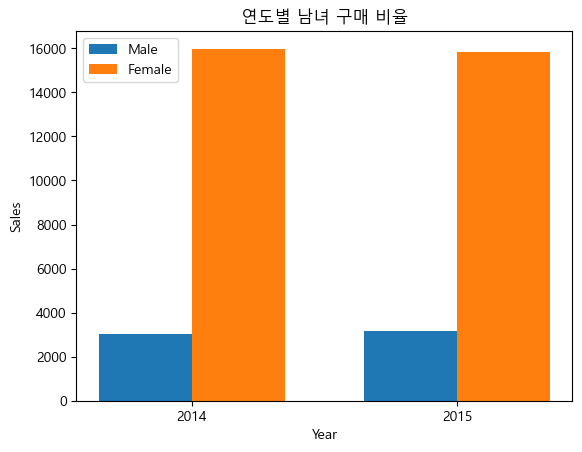

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 설정
years = ['2014', '2015']
male_sales = [3018, 3176]  # 남자 매출
female_sales = [15982, 15824]  # 여자 매출

# 막대 그래프의 너비
bar_width = 0.35

# x축 위치 설정
bar_positions_1 = np.arange(len(years))
bar_positions_2 = bar_positions_1 + bar_width

# 그래프 그리기
plt.bar(bar_positions_1, male_sales, width=bar_width, label='Male')  # 남자 매출 막대그래프
plt.bar(bar_positions_2, female_sales, width=bar_width, label='Female')  # 여자 매출 막대그래프

# x축 레이블 설정
plt.xticks(bar_positions_1 + bar_width / 2, years)

# 그래프 스타일 설정
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('연도별 남녀 구매 비율')
plt.legend()

# 그래프 출력
plt.show()


In [15]:
a['감소고객'].value_counts()

1    8064
Name: 감소고객, dtype: int64

In [ ]:

cd_age =cd.groupby('연령대')['구매 총액'].sum().reset_index()
cd_age

In [22]:
import pickle

with open('../dataset/customerdata.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [25]:
hi = loaded_data
hi['연령대']

0          60세이상
1          60세이상
2          60세이상
3          60세이상
4          60세이상
          ...   
19378    50세~54세
19379    40세~44세
19380    35세~39세
19381    40세~44세
19382    25세~29세
Name: 연령대, Length: 19383, dtype: object

In [26]:
hi_age =hi.groupby('연령대')['구매 총액'].sum().reset_index()
hi_age

,연령대,구매 총액
0,19세이하,140593647
1,20세~24세,3929990387
2,25세~29세,18624980673
3,30세~34세,51126952633
4,35세~39세,102581074645
5,40세~44세,124258607541
6,45세~49세,131191999671
7,50세~54세,110464032296
8,55세~59세,74073428801
9,60세이상,60627496647


In [27]:
list = ['19세이하', '20세~24세', '25세~29세', '30세~34세', '35세~39세', '40세~44세', '45세~49세','50세~54세','55세~59세','60세이상']


Text(0.5, 1.0, '연령대 별 구매 총액')

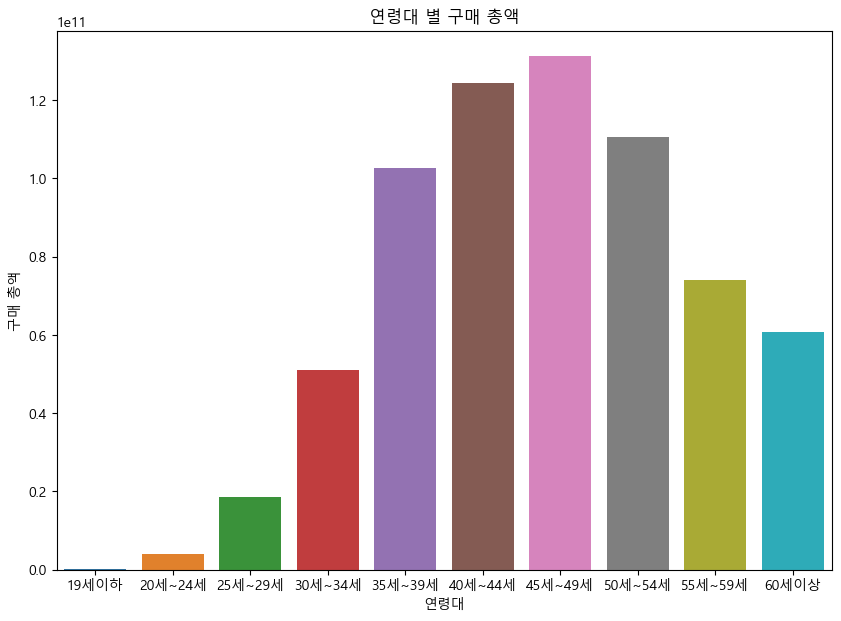

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sns.barplot(data=hi_age, x='연령대', y = '구매 총액' )
plt.title('연령대 별 구매 총액')

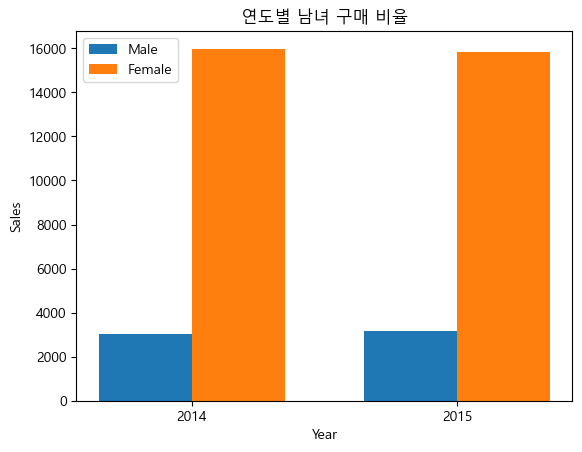

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 설정
years = ['2014', '2015']
a = [4680000000000, 4680000000000] #대형마트
b = [3000000000000, 2700000000000] #백화점
c = [2220000000000, 2200000000000]# ssm
d = [1200000000000, 1500000000000]# 편의점
# 막대 그래프의 너비
bar_width = 0.35

# x축 위치 설정
bar_positions_1 = np.arange(len(years))
bar_positions_2 = bar_positions_1 + bar_width

# 그래프 그리기
plt.bar(bar_positions_1, male_sales, width=bar_width, label='Male')  # 남자 매출 막대그래프
plt.bar(bar_positions_2, female_sales, width=bar_width, label='Female')  # 여자 매출 막대그래프

# x축 레이블 설정
plt.xticks(bar_positions_1 + bar_width / 2, years)

# 그래프 스타일 설정
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('연도별 남녀 구매 비율')
plt.legend()

# 그래프 출력
plt.show()

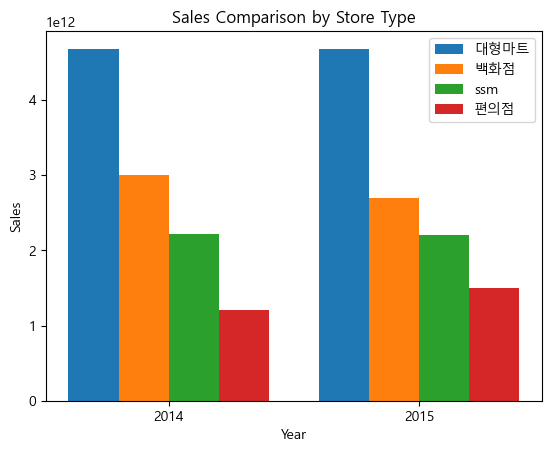

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 설정
years = ['2014', '2015']
a = [4680000000000, 4680000000000]  # 대형마트
b = [3000000000000, 2700000000000]  # 백화점
c = [2220000000000, 2200000000000]  # ssm
d = [1200000000000, 1500000000000]  # 편의점

# x축 위치 설정
x = np.arange(len(years))

# 그래프 그리기
plt.bar(x - 0.3, a, width=0.2, label='대형마트')
plt.bar(x - 0.1, b, width=0.2, label='백화점')
plt.bar(x + 0.1, c, width=0.2, label='ssm')
plt.bar(x + 0.3, d, width=0.2, label='편의점')

# x축 레이블 설정
plt.xticks(x, years)

# 그래프 스타일 설정
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Comparison by Store Type')
plt.legend()

# 그래프 출력
plt.show()


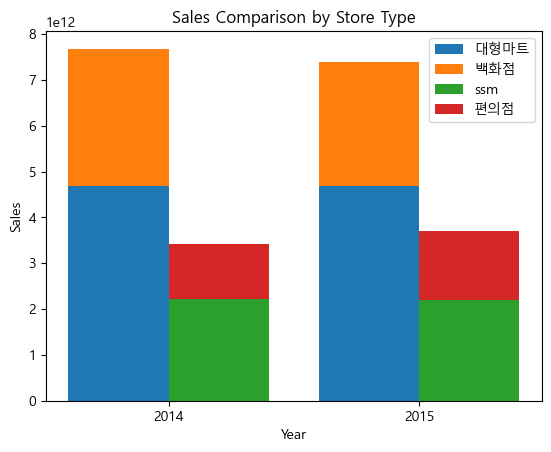

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 설정
years = ['2014', '2015']
a = [4680000000000, 4680000000000]  # 대형마트
b = [3000000000000, 2700000000000]  # 백화점
c = [2220000000000, 2200000000000]  # ssm
d = [1200000000000, 1500000000000]  # 편의점

# x축 위치 설정
x = np.arange(len(years))

# 그래프 그리기
plt.bar(x - 0.2, a, width=0.4, label='대형마트')
plt.bar(x - 0.2, b, width=0.4, bottom=a, label='백화점')
plt.bar(x + 0.2, c, width=0.4, label='ssm')
plt.bar(x + 0.2, d, width=0.4, bottom=c, label='편의점')

# x축 레이블 설정
plt.xticks(x, years)

# 그래프 스타일 설정
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Comparison by Store Type')
plt.legend()

# 그래프 출력
plt.show()


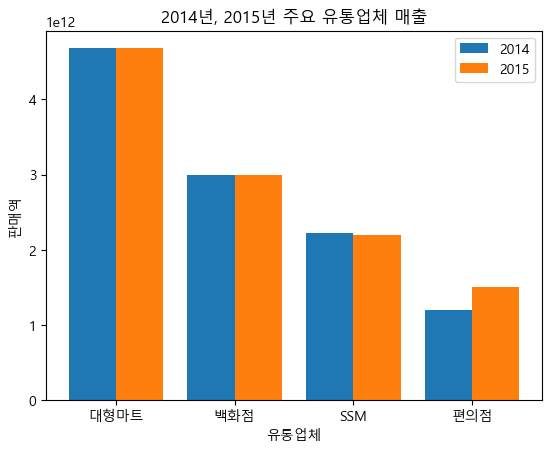

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 설정
stores = ['대형마트', '백화점', 'SSM', '편의점']
sales_2014 = [4680000000000, 3000000000000, 2220000000000, 1200000000000]
sales_2015 = [4680000000000, 3000010000000, 2200000000000, 1500000000000]

# x축 위치 설정
x = np.arange(len(stores))

# 그래프 그리기
plt.bar(x - 0.2, sales_2014, width=0.4, label='2014')
plt.bar(x + 0.2, sales_2015, width=0.4, label='2015')

# x축 레이블 설정
plt.xticks(x, stores)

# 그래프 스타일 설정
plt.xlabel('유통업체')
plt.ylabel('판매액')
plt.title('2014년, 2015년 주요 유통업체 매출')
plt.legend()

# 그래프 출력
plt.show()


In [ ]:
a = cd[cd['연령대']=='중년층']

quarterly_means = a.iloc[:,11:19].mean()
#print(quarterly_means,'\n')
#각 분기별 평균 이상인 분기 구하기
mean_threshold = 5  # 평균 이상인 분기 개수
satisfied_quarters = a.iloc[:, 11:19].apply(lambda x: x >= x.mean(), axis=1).sum(axis=1) >= mean_threshold

# 평균 이상인 분기를 가진 고객 선택
satisfied_customers = a[satisfied_quarters]

sc = satisfied_customers
sc.head(3)

In [7]:
cd.head(2)

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
0,00752,M,노년층,울산,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,일상용품,패션잡화,가공식품,일상용품,패션잡화,가공식품,디지털/가전,패션잡화,일상용품,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55
1,00754,F,노년층,서울,2.0,13.0,13.0,NaN,A,2,A2,5648899.0,6560856.0,4868150.0,19591410.0,3494579.0,4871427.0,1973879.0,12647258.0,934973.0,-1768137.0,15505680.0,-16803490.0,1386354.0,-2915258.0,11151190.0,6,619,60431637,97627.85,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,7491312.0,0,2,10,3,3,116.14,74.20,402.44,17.84,139.40,40.52,640.73


In [8]:
quarterly_means = cd.iloc[:,11:19].mean()
#print(quarterly_means,'\n')
#각 분기별 평균 이상인 분기 구하기
mean_threshold = 5  # 평균 이상인 분기 개수
satisfied_quarters = cd.iloc[:, 11:19].apply(lambda x: x >= x.mean(), axis=1).sum(axis=1) >= mean_threshold

# 평균 이상인 분기를 가진 고객 선택
satisfied_customers = cd[satisfied_quarters]

sc = satisfied_customers
sc.head(3)

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
3,00790,F,노년층,인천,30.0,34.0,18.0,NaN,B,34,B34,1021485.0,1336503.0,1335952.0,1321346.0,1378937.0,968753.0,780510.0,1264045.0,318305.0,-23952.0,61684.0,-2459.0,-400881.0,-200821.0,544904.0,1,1138,9406954,8266.22,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,기타,신선식품,가공식품,296780.0,0,1,7,10,8,130.84,99.96,98.91,104.36,70.25,80.57,161.95
11,00880,F,노년층,부산,29.0,107.0,NaN,NaN,B,107,B107,1669350.0,1043677.0,1649462.0,2010143.0,1116889.0,1580285.0,1638626.0,1087577.0,-613660.0,573361.0,467802.0,-973977.0,466298.0,29294.0,-475675.0,2,1618,11779535,7280.31,신선식품,가공식품,일상용품,신선식품,가공식품,일상용품,일상용품,가공식품,신선식품,-526557.0,1,1,5,9,9,62.52,158.04,121.87,55.56,141.49,103.69,66.37
14,00905,F,노년층,부산,4.0,NaN,94.0,NaN,A,4,A4,6082028.0,8006153.0,5232090.0,6346113.0,5484058.0,6600890.0,200080.0,0.0,1943419.0,-2849574.0,1452785.0,-1138120.0,1137828.0,-6367048.0,NaN,116,681,37830872,55551.94,일상용품,신선식품,가공식품,일상용품,신선식품,가공식품,가공식품,신선식품,일상용품,NaN,0,4,10,4,3,131.64,65.35,121.29,86.42,120.37,3.03,0.00


In [9]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2970 entries, 3 to 19373
Data columns (total 52 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객번호      2970 non-null   object 
 1   성별        2970 non-null   object 
 2   연령대       2970 non-null   object 
 3   거주지역      2970 non-null   object 
 4   A선호점포     2920 non-null   float64
 5   B선호점포     2851 non-null   float64
 6   C선호점포     2674 non-null   float64
 7   D선호점포     552 non-null    float64
 8   선호제휴사     2970 non-null   object 
 9   선호점포      2970 non-null   int64  
 10  선호제휴점포    2970 non-null   object 
 11  14_1분기    2970 non-null   float64
 12  14_2분기    2970 non-null   float64
 13  14_3분기    2970 non-null   float64
 14  14_4분기    2970 non-null   float64
 15  15_1분기    2970 non-null   float64
 16  15_2분기    2970 non-null   float64
 17  15_3분기    2970 non-null   float64
 18  15_4분기    2970 non-null   float64
 19  14_2분기변화  2877 non-null   float64
 20  14_3분기변화  2930 non-null   flo

In [4]:
import pickle

with open('../dataset/predictdata.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [8]:
df = loaded_data
df.head(2)

,고객번호,성별,연령대,거주지역,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,최근성,행동 빈도,구매 총액,15_4분기,가공Q14_1,가공Q14_2,가공Q14_3,가공Q14_4,가공Q15_1,가공Q15_2,가공Q15_3,가공Q15_4,신선Q14_1,신선Q14_2,신선Q14_3,신선Q14_4,신선Q15_1,신선Q15_2,신선Q15_3,신선Q15_4,일상Q14_1,일상Q14_2,일상Q14_3,일상Q14_4,일상Q15_1,일상Q15_2,일상Q15_3,일상Q15_4,의약Q14_1,의약Q14_2,의약Q14_3,의약Q14_4,의약Q15_1,의약Q15_2,의약Q15_3,의약Q15_4,교육Q14_1,교육Q14_2,교육Q14_3,교육Q14_4,교육Q15_1,교육Q15_2,교육Q15_3,교육Q15_4,디지털Q14_1,디지털Q14_2,디지털Q14_3,디지털Q14_4,디지털Q15_1,디지털Q15_2,디지털Q15_3,디지털Q15_4,가구Q14_1,가구Q14_2,가구Q14_3,가구Q14_4,가구Q15_1,가구Q15_2,가구Q15_3,가구Q15_4,의류Q14_1,의류Q14_2,의류Q14_3,의류Q14_4,의류Q15_1,의류Q15_2,의류Q15_3,의류Q15_4,전문스포츠Q14_1,전문스포츠Q14_2,전문스포츠Q14_3,전문스포츠Q14_4,전문스포츠Q15_1,전문스포츠Q15_2,전문스포츠Q15_3,전문스포츠Q15_4,패션잡화Q14_1,패션잡화Q14_2,패션잡화Q14_3,패션잡화Q14_4,패션잡화Q15_1,패션잡화Q15_2,패션잡화Q15_3,패션잡화Q15_4,명품Q14_1,명품Q14_2,명품Q14_3,명품Q14_4,명품Q15_1,명품Q15_2,명품Q15_3,명품Q15_4,기타Q14_1,기타Q14_2,기타Q14_3,기타Q14_4,기타Q15_1,기타Q15_2,기타Q15_3,기타Q15_4,R 등급,F 등급,M 등급,15_4분기변화,14_2분기변화율,14_3분기변화율,14_4분기변화율,15_1분기변화율,15_2분기변화율,15_3분기변화율,15_4분기변화율,14_2변화등급,14_3변화등급,14_4변화등급,15_1변화등급,15_2변화등급,15_3변화등급,15_4변화등급
0,00077,F,노년층,부산,4206241.0,5238049.0,4110362.0,4155548.0,3875982.0,4083513.0,3468666.0,1031808.0,-1127687.0,45186.0,-279566.0,207531.0,-614847.0,29.0,90.0,NaN,NaN,A,29.0,A29,1.0,939.0,28961456.0,7142362.0,328194,372034,884849,512103,818361,602972,551008,493473,914702,874686,823087,738995,644140,636906,721382,1009006,887771,733017,530380,260013,1595519,507124,588283,1233115,0,0,0,0,0,0,0,0,187228,27459,72597,34628,0,6438,0,19049,0,0,0,0,0,0,0,1790189,0,0,121640,0,0,23939,0,104435,748957,2062399,899035,2337602,600204,2073333,1017050,1116486,0,57334,0,0,0,0,86571,183728,1089850,53311,529662,174638,142343,189654,123483,713444,49537,1057809,194541,0,40236,0,125837,86062,0,0,40752,97560,0,43151,255054,393371,1,8,4,3673696.0,4.832545,4.375380,4.625953,4.546163,4.666736,4.453649,5.332284,2,4,3,3,3,4,1
1,00078,F,노년층,서울,9766885.0,6514676.0,9668621.0,9744667.0,11963968.0,21988555.0,11833083.0,-3252209.0,3153945.0,76046.0,2219301.0,10024587.0,-10155472.0,2.0,7.0,191.0,NaN,A,2.0,A2,6.0,900.0,80909783.0,11077953.0,845594,329587,940729,1160815,1260741,1651354,788770,1109052,745495,308108,493374,722981,1125722,1095570,1047296,491598,436261,27359,716874,479790,451917,425567,582026,131288,24243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,220957,0,10110,49287,182254,98440,49537,21425,141503,241603,315297,186214,32683,0,580288,1495055,3566999,1604913,3676441,14275567,4456674,4827551,1237712,226800,864213,2340415,3543297,899789,1084023,1208980,4243372,2305101,729958,1852695,1192544,3099427,115496,1367962,1604386,1801238,1848210,1341456,387904,276611,2784074,1837280,0,0,145803,0,0,29171,759785,5802,2,8,2,-755130.0,4.215086,5.006694,4.622912,4.818425,5.219220,4.003873,4.549869,5,2,3,2,1,5,2


In [ ]:
# 칼럼순서 재설정
# Oracle 데이터베이스 연결
connection = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')

# 쿼리 실행하여 데이터프레임 생성
query = 'SELECT YEAR, HYEAR, 제휴사, 반기별매출 FROM MASTERDATA'
df_hr = pd.read_sql(query, con=connection)

# 칼럼 순서 변경
df_hr = df_hr[['YEAR', 'HYEAR', '제휴사', '반기별매출']]

# 연결 종료
connection.close()

df_hr.head()

In [6]:
import cx_Oracle
import pandas as pd

db = cx_Oracle.connect("c##lm","lm",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from MDT")
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='MDT'")
col = cursor.fetchall()

list1 = []
for i in col:
    for j in i:
        list1.append(j)
df.columns= list1
df.head()

,고객번호,가공Q14_1,가공Q14_2,가공Q14_3,가공Q14_4,가공Q15_1,가공Q15_2,가공Q15_3,가공Q15_4,신선Q14_1,신선Q14_2,신선Q14_3,신선Q14_4,신선Q15_1,신선Q15_2,신선Q15_3,신선Q15_4,일상Q14_1,일상Q14_2,일상Q14_3,일상Q14_4,일상Q15_1,일상Q15_2,일상Q15_3,일상Q15_4,의약Q14_1,의약Q14_2,의약Q14_3,의약Q14_4,의약Q15_1,의약Q15_2,의약Q15_3,의약Q15_4,교육Q14_1,교육Q14_2,교육Q14_3,교육Q14_4,교육Q15_1,교육Q15_2,교육Q15_3,교육Q15_4,디지털Q14_1,디지털Q14_2,디지털Q14_3,디지털Q14_4,디지털Q15_1,디지털Q15_2,디지털Q15_3,디지털Q15_4,가구Q14_1,가구Q14_2,가구Q14_3,가구Q14_4,가구Q15_1,가구Q15_2,가구Q15_3,가구Q15_4,의류Q14_1,의류Q14_2,의류Q14_3,의류Q14_4,의류Q15_1,의류Q15_2,의류Q15_3,의류Q15_4,전문스포츠Q14_1,전문스포츠Q14_2,전문스포츠Q14_3,전문스포츠Q14_4,전문스포츠Q15_1,전문스포츠Q15_2,전문스포츠Q15_3,전문스포츠Q15_4,패션잡화Q14_1,패션잡화Q14_2,패션잡화Q14_3,패션잡화Q14_4,패션잡화Q15_1,패션잡화Q15_2,패션잡화Q15_3,패션잡화Q15_4,명품Q14_1,명품Q14_2,명품Q14_3,명품Q14_4,명품Q15_1,명품Q15_2,명품Q15_3,명품Q15_4,기타Q14_1,기타Q14_2,기타Q14_3,기타Q14_4,기타Q15_1,기타Q15_2,기타Q15_3,기타Q15_4
0,00001,1379173,2282136,929957,908728,1110386,663081,512023,329368,427220,717513,281110,980566,656613,497616,132082,226139,1662636,548342,3455977,1261234,885306,96552,0,756728,0,0,0,7736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10137,8753385,294188,0,1843019,0,179596,0,65366,4551042,86437,627564,0,133203,3755962,4404303,5379261,4426445,4071735,5852927,3333828,2876727,714543,1444812,0,0,515314,90779,240258,145048,402906,1363310,185376,1212634,1141216,5029,907225,283328,0,0,242203,0,509016,254683,0,0,719699,86503,489832,462706,134700,557487,1024719,370579
1,00002,1234359,798405,760258,688830,538881,184895,534629,700220,1704734,1662722,1127915,1086250,1385203,761112,851922,974743,6175733,2402598,5778958,1806095,3966320,5819986,3372871,3916338,0,0,0,0,0,32892,0,0,0,0,0,0,0,0,0,0,298232,1133299,704443,0,1901607,0,3462469,0,480103,56127,0,46029,78975,0,297863,0,1633572,1585622,3142184,2124149,6923143,1599715,3604229,5203141,2218370,1765710,2320115,424470,1798479,646394,1199416,517185,335961,795673,984592,249609,530519,319661,698494,293434,0,0,0,419819,1560824,0,0,0,197136,59346,377409,1934,0,0,151537,0
2,00003,209418,329982,342955,241491,161364,211787,201763,147175,96055,118706,244033,79967,97314,72234,171098,89361,0,20972,42082,58956,23534,28755,56177,3568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80469,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7542,0,0,0,0,0,0,0,0,612,1500,7060,912,153,2012,2048,1934
3,00004,417324,582003,421417,187660,544202,550251,454950,580455,186979,440087,88374,164240,392334,333339,265071,169738,129372,72399,457487,345600,160216,247238,122847,90278,0,0,0,9477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,102390,311273,0,0,75461,0,98670,866447,692115,587620,445204,690824,713760,403476,143101,262076,530738,91864,30329,32187,144903,0,348547,1082301,195974,65175,0,77049,53857,82194,0,0,0,0,0,0,174063,0,0,449015,4096,0,184045,0,173039,230850
4,00005,1430520,1081469,800725,353822,1013784,722548,0,1493314,376519,435916,251779,31466,180434,89832,0,149526,1107997,185783,287562,0,486017,0,0,184008,0,0,0,0,0,2867,0,0,0,0,0,0,0,0,0,0,0,50192,0,0,0,0,0,0,0,0,217374,0,0,0,0,0,130211,336057,169967,0,467466,0,0,693380,63771,0,72902,0,0,0,0,0,70768,149441,70649,0,0,0,0,9670,0,57334,0,0,0,0,0,0,0,32188,0,0,0,0,0,0


In [11]:
import pickle

with open('../dataset/customerdata.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [19]:
customerdata = loaded_data
customerdata.head(3)

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
0,00752,M,60세이상,440,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55
1,00754,F,60세이상,055,2.0,13.0,13.0,NaN,A,2,A2,5648899.0,6560856.0,4868150.0,19591410.0,3494579.0,4871427.0,1973879.0,12647258.0,934973.0,-1768137.0,15505680.0,-16803490.0,1386354.0,-2915258.0,11151190.0,6,619,60431637,97627.85,7491312.0,0,2,10,3,3,116.14,74.20,402.44,17.84,139.40,40.52,640.73
2,00756,F,60세이상,024,3.0,11.0,11.0,NaN,C,11,C11,1874674.0,4469948.0,3135032.0,2047996.0,970862.0,5729412.0,886631.0,2349480.0,2589564.0,-1382068.0,-943947.0,-1157567.0,4735713.0,-4830118.0,1563748.0,1,1656,21430060,12940.86,575325.0,0,1,5,6,6,238.44,70.14,65.33,47.41,590.14,15.48,264.99


In [20]:
customerdata1 = customerdata[customerdata['감소고객']==1]

down = customerdata1[['14_1분기', '14_2분기', '14_3분기', '14_4분기',
       '15_1분기', '15_2분기', '15_3분기', '15_4분기']].sum().sum()
down

262661806059.0

15010    0
Name: 감소고객, dtype: int64


<AxesSubplot:>

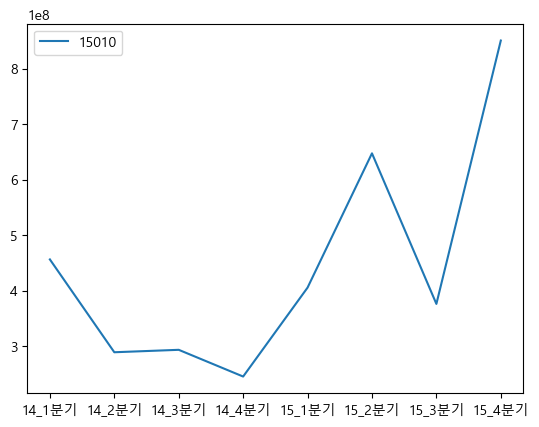

In [22]:
import seaborn as sns

c = customerdata[customerdata["고객번호"] == "15999"]
print(c["감소고객"])
sns.lineplot(c[['14_1분기', '14_2분기', '14_3분기', '14_4분기','15_1분기', '15_2분기', '15_3분기', '15_4분기']].transpose())

In [ ]:
def get_rmse(model):
    pred = model.predeict(X_test)
    mse = mean_squared_error(ytest, pred)
    rmse = np.sqrt(mse)
    print(f'{model.__class__.__name__}')

In [10]:
import pickle

with open('../dataset/testdata.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [11]:
a = loaded_data
a.head(3)

,고객번호,성별,연령대,거주지역,선호제휴점포,가공test변화율,가공test순증감률,신선test변화율,신선test순증감률,일상test변화율,일상test순증감률,의약test변화율,의약test순증감률,교육test변화율,교육test순증감률,디지털test변화율,디지털test순증감률,가구test변화율,가구test순증감률,의류test변화율,의류test순증감률,전문스포츠test변화율,전문스포츠test순증감률,패션test변화율,패션test순증감률,명품test변화율,명품test순증감률,기타test변화율,기타test순증감률,종합변화율test,종합순증감률test,Rtest랭크,Ftest랭크,Mtest랭크,testLabel
0,00077,F,노년층,부산,A29,11,1,1,-1,9,-1,1,0,3,0,0,0,8,0,8,-1,5,1,11,2,4,-1,18,5,1,-1,1,4,8,173.76
1,00078,F,노년층,서울,A2,16,4,7,4,16,7,3,0,0,0,6,2,5,0,7,1,4,2,3,0,2,0,18,5,3,1,9,4,10,114.58
2,00079,F,노년층,서울,B7,7,2,9,2,18,-2,1,0,2,-1,0,0,2,0,9,1,7,-2,10,-2,1,0,9,-4,7,1,5,8,5,65.52


In [12]:
import pickle

with open('../dataset/traindata.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [13]:
b = loaded_data
b.head(3)

,고객번호,성별,연령대,거주지역,선호제휴점포,가공train변화율,가공train순증감률,신선train변화율,신선train순증감률,일상train변화율,일상train순증감률,의약train변화율,의약train순증감률,교육train변화율,교육train순증감률,디지털train변화율,디지털train순증감률,가구train변화율,가구train순증감률,의류train변화율,의류train순증감률,전문스포츠train변화율,전문스포츠train순증감률,패션train변화율,패션train순증감률,명품train변화율,명품train순증감률,기타train변화율,기타train순증감률,종합변화율train,종합순증감률train,Rtrain랭크,Ftrain랭크,Mtrain랭크,trainLabel
0,00077,F,노년층,부산,A29,10,2,1,-1,9,-1,1,-1,3,-1,0,0,7,1,7,1,3,-1,11,-3,3,-1,15,1,0,0,9,4,8,66.22
1,00078,F,노년층,서울,A2,13,1,7,1,16,0,3,-3,0,0,5,1,4,0,7,3,4,0,0,0,1,-1,15,1,4,0,5,4,10,181.64
2,00079,F,노년층,서울,B7,7,1,9,-3,14,2,1,-1,2,0,0,0,2,0,5,-3,5,1,8,-2,1,-1,9,-1,7,1,1,8,5,124.31
